In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('display.max_columns', 500)

In [23]:
dataset_xg = pd.read_parquet("./data/final_datasets/dataset_xg.parquet")
dataset_xt = pd.read_parquet("./data/final_datasets/dataset_xt.parquet")
dataset_vaep = pd.read_parquet("./data/final_datasets/dataset_vaep.parquet")

In [24]:
#dataset_xg.head()
conjunto_times = set(list(dataset_xg["Team"].unique()) + list(dataset_xg["Away"].unique()))
conjunto_times = list(conjunto_times)
#conjunto_times = ['Arsenal']
dataset_xg.head()

player pos  player_age  last_time_played  \
0  Ainsley Maitland-Niles  LM          23               0.0   
1     Alexandre Lacazette  FW          29               0.0   
2           Dani Ceballos  CM          24               0.0   
3           Eddie Nketiah  FW          21               0.0   
4            Granit Xhaka  CM          27               0.0   

   last_shots_on_target  last_goals  last_touches  last_yellow_cards  \
0                   0.0         0.0           0.0                0.0   
1                   0.0         0.0           0.0                0.0   
2                   0.0         0.0           0.0                0.0   
3                   0.0         0.0           0.0                0.0   
4                   0.0         0.0           0.0                0.0   

   last_completed_passes_perc last_result  last_xg  last_xag  \
0                         0.0           0      0.0       0.0   
1                         0.0           0      0.0       0.0   
2                         0.0           0      0.0       0.0   
3                         0.0           0      0.0       0.0   
4                         0.0           0      0.0       0.0   

   days_from_last_game  played_at_home  Season_End_Year  Wk    Team     Away  \
0                 14.0           False             2021   1  Fulham  Arsenal   
1                 14.0           False             2021   1  Fulham  Arsenal   
2                 14.0           False             2021   1  Fulham  Arsenal   
3                 14.0           False             2021   1  Fulham  Arsenal   
4                 14.0           False             2021   1  Fulham  Arsenal   

   Capacity  tavg  tmin  tmax  prcp  snow  wspd  wpgt  travel_distance  target  
0     25700  16.2  11.7  21.3   0.3   0.0  14.3  31.5      5748.416939     0.0  
1     25700  16.2  11.7  21.3   0.3   0.0  14.3  31.5      5748.416939     0.9  
2     25700  16.2  11.7  21.3   0.3   0.0  14.3  31.5      5748.416939     0.0  
3     25700  16.2  11.7  21.3   0.3   0.0  14.3  31.5      5748.416939     0.0  
4     25700  16.2  11.7  21.3   0.3   0.0  14.3  31.5      5748.416939     0.2

In [29]:
def agrupar_features_por_time(dataset):
    dataset_features_time = {}
    for time in conjunto_times:
        dataset_time = pd.concat([dataset[dataset["Team"] == time], dataset[dataset["Away"] == time]])
        dataset_features_time[time] = {}
        for week in list(dataset_time['Wk'].unique()):
            dataset_time_semana = dataset_time[dataset_time['Wk'] == week]
            dataset_features_time[time][week] =  {}
            dataset_features_time[time][week]['player_age'] = dataset_time_semana['player_age'].mean()
            dataset_features_time[time][week]['last_time_played'] = dataset_time_semana['last_time_played'].sum()
            dataset_features_time[time][week]['last_shots_on_target'] = dataset_time_semana['last_shots_on_target'].sum()
            dataset_features_time[time][week]['last_goals'] = dataset_time_semana['last_goals'].sum()
            dataset_features_time[time][week]['last_touches'] = dataset_time_semana['last_touches'].sum()
            dataset_features_time[time][week]['last_yellow_cards'] = dataset_time_semana['last_yellow_cards'].sum()
            dataset_features_time[time][week]['last_completed_passes_perc'] = dataset_time_semana['last_completed_passes_perc'].mean()
            #dataset_features_time[time]['last_result'] = dataset_time_semana['last_result'].mean()
            dataset_features_time[time][week]['last_xg'] = dataset_time_semana['last_xg'].sum()
            dataset_features_time[time][week]['last_xag'] = dataset_time_semana['last_xag'].sum()
            dataset_features_time[time][week]['days_from_last_game'] = dataset_time_semana['days_from_last_game'].mean()
            dataset_features_time[time][week]['Capacity'] = dataset_time_semana['Capacity'].mean()
            dataset_features_time[time][week]['tavg'] = dataset_time_semana['tavg'].mean()
            dataset_features_time[time][week]['tmin'] = dataset_time_semana['tmin'].mean()
            dataset_features_time[time][week]['tmax'] = dataset_time_semana['tmax'].mean()
            dataset_features_time[time][week]['prcp'] = dataset_time_semana['prcp'].mean()
            dataset_features_time[time][week]['snow'] = dataset_time_semana['snow'].mean()
            dataset_features_time[time][week]['wspd'] = dataset_time_semana['wspd'].mean()
            dataset_features_time[time][week]['wpgt'] = dataset_time_semana['wpgt'].mean()
            dataset_features_time[time][week]['travel_distance'] = dataset_time_semana['travel_distance'].mean()
            dataset_features_time[time][week]['target'] = dataset_time_semana['target'].sum()
    return dataset_features_time

In [51]:
dataset_features_time = agrupar_features_por_time(dataset_xg)

### xG dataset

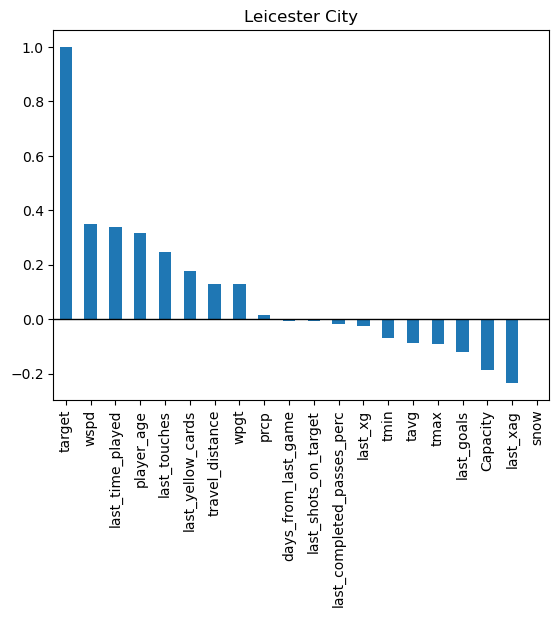

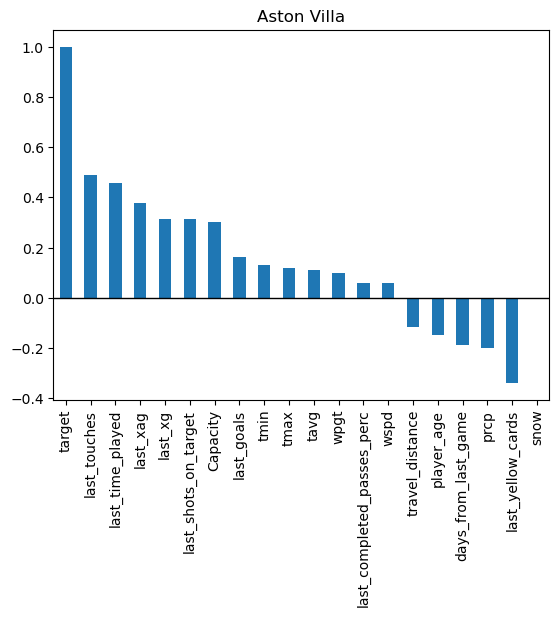

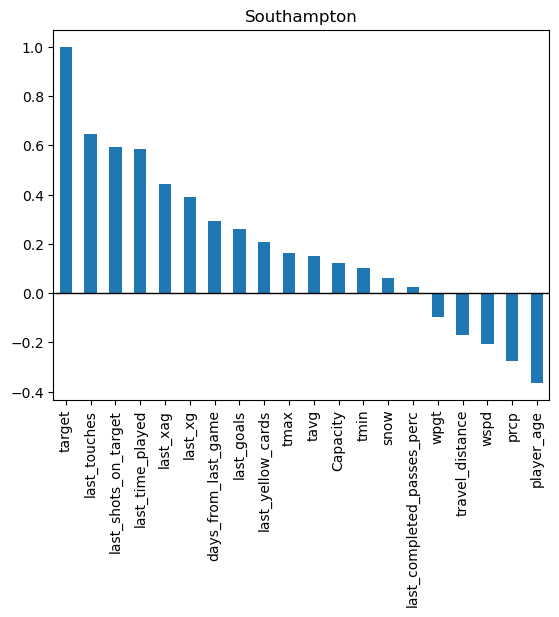

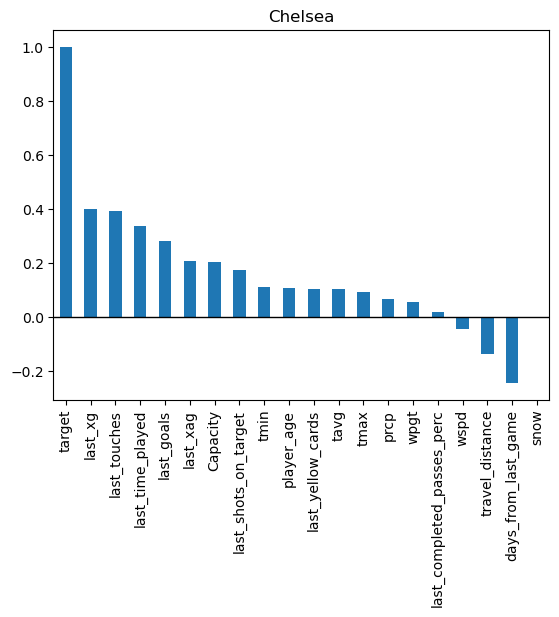

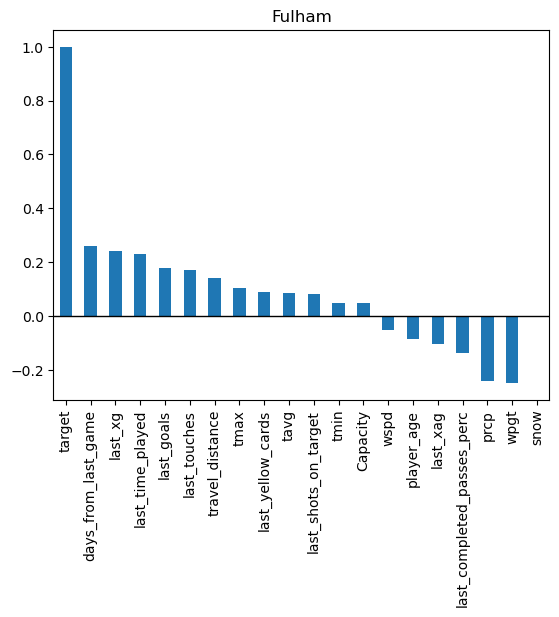

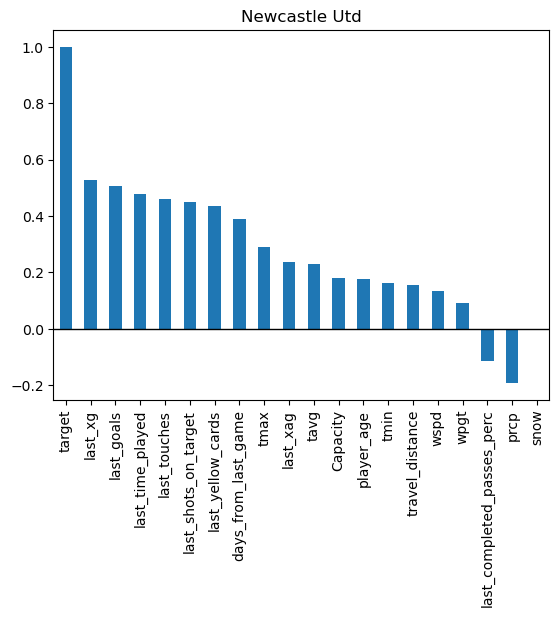

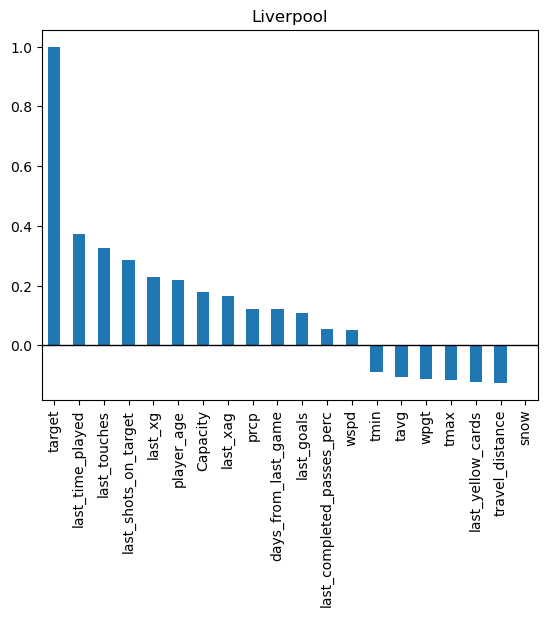

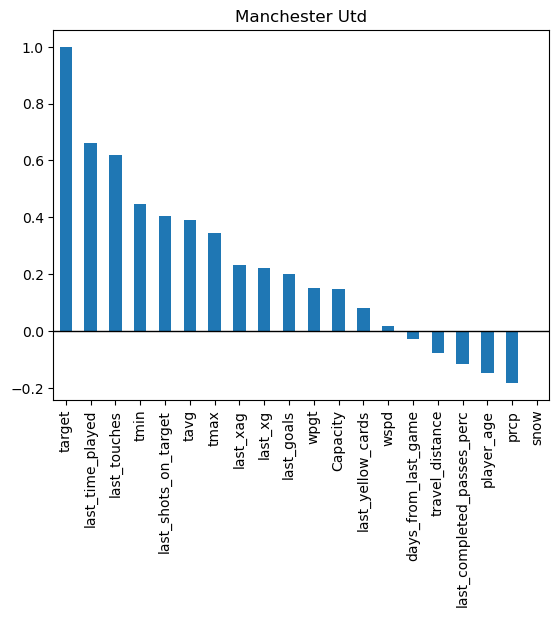

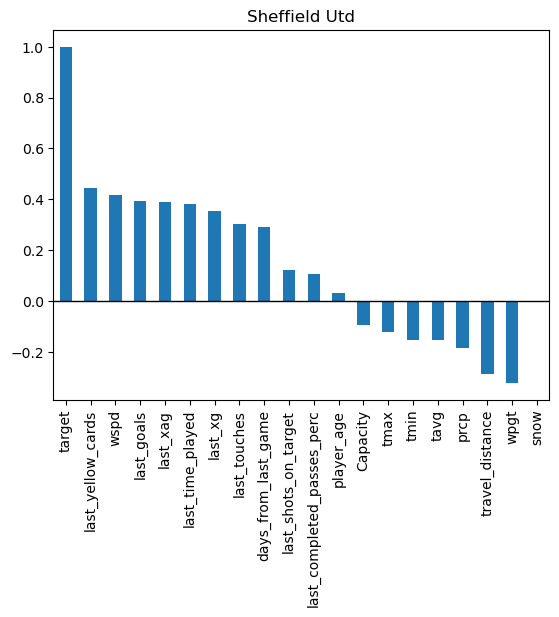

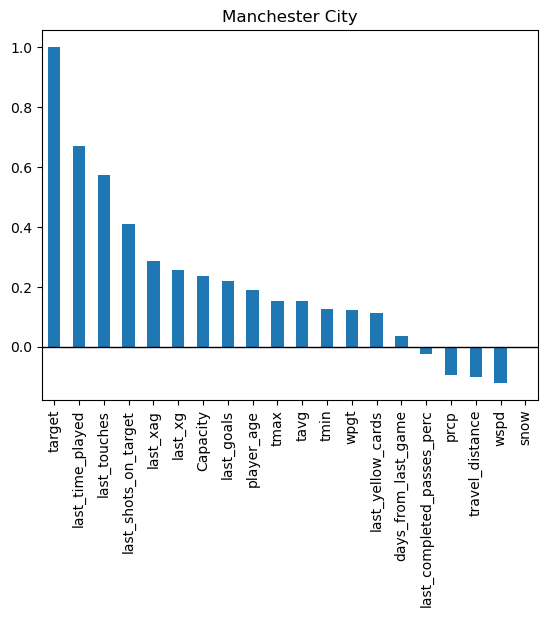

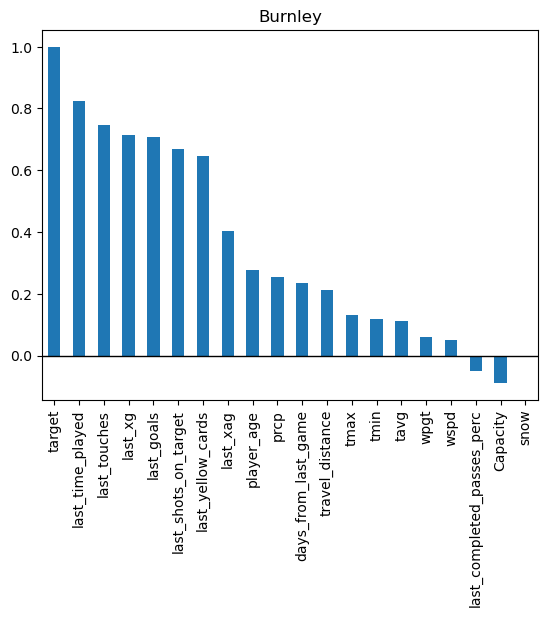

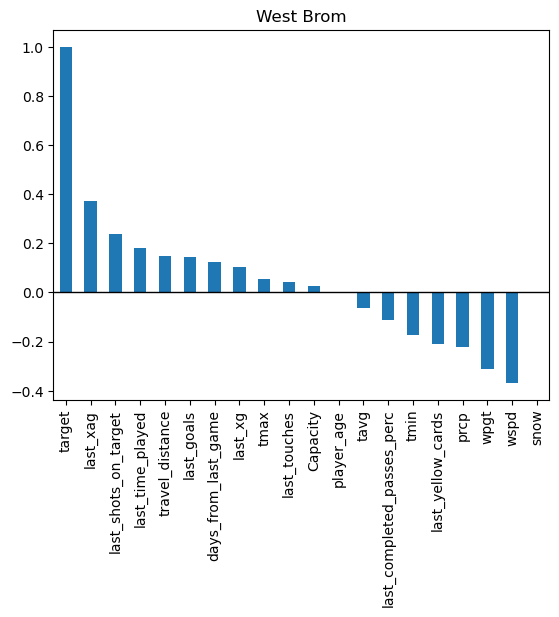

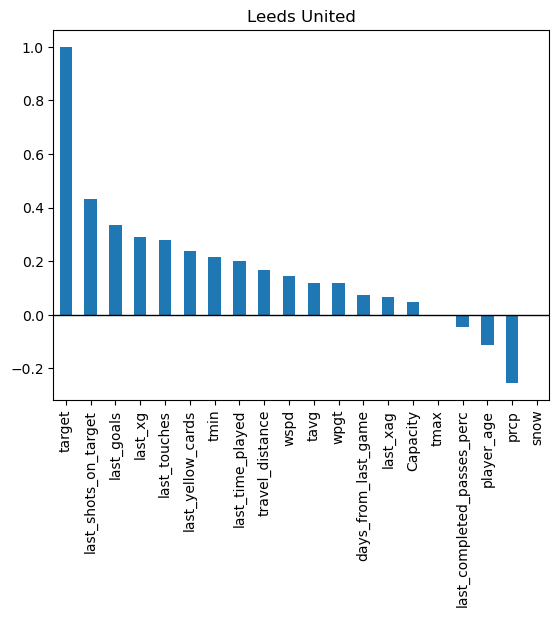

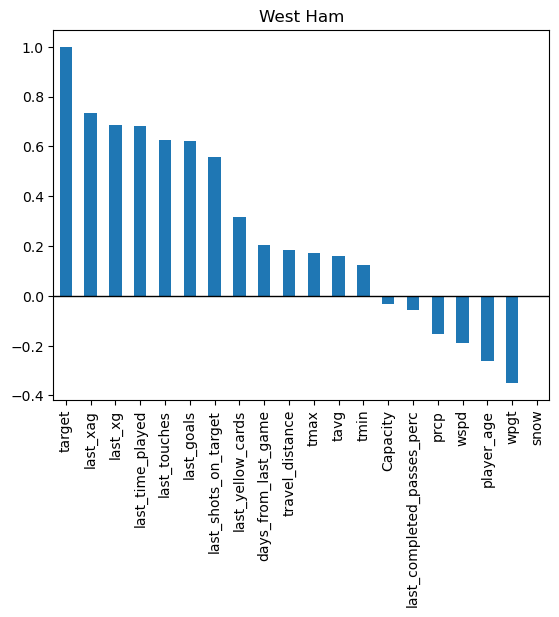

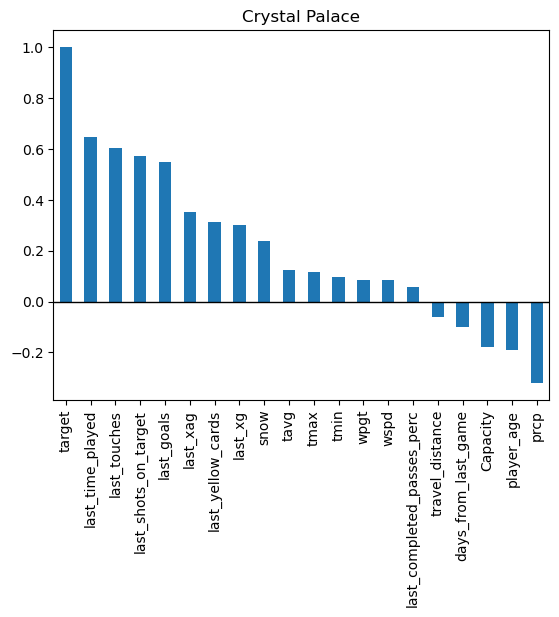

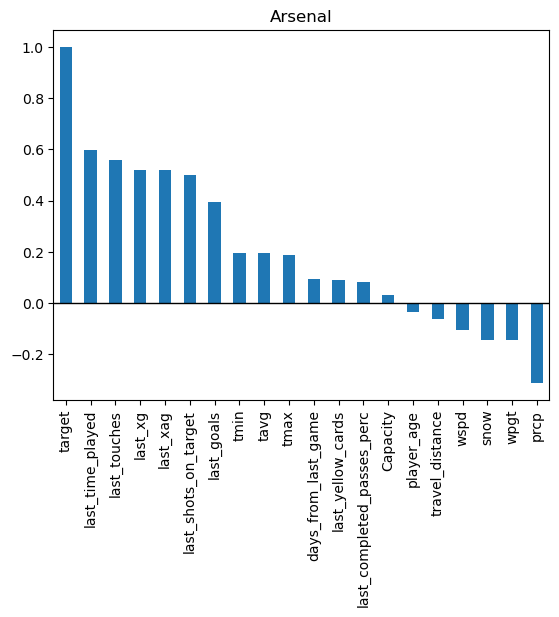

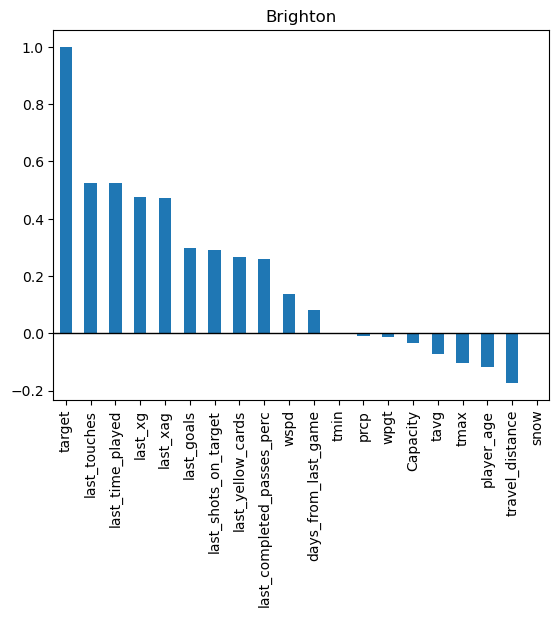

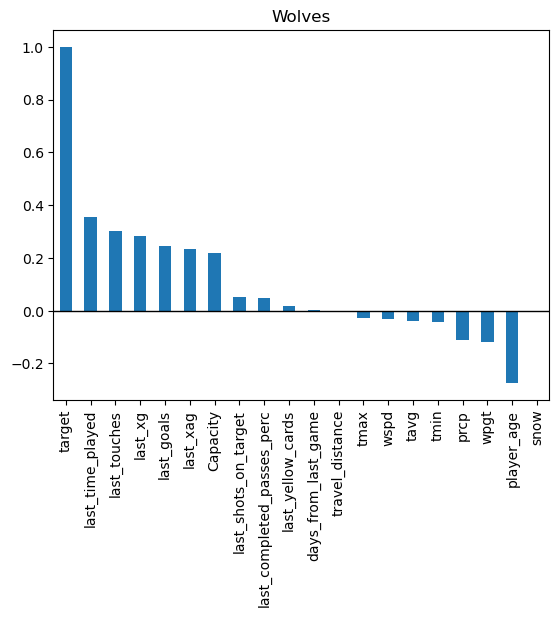

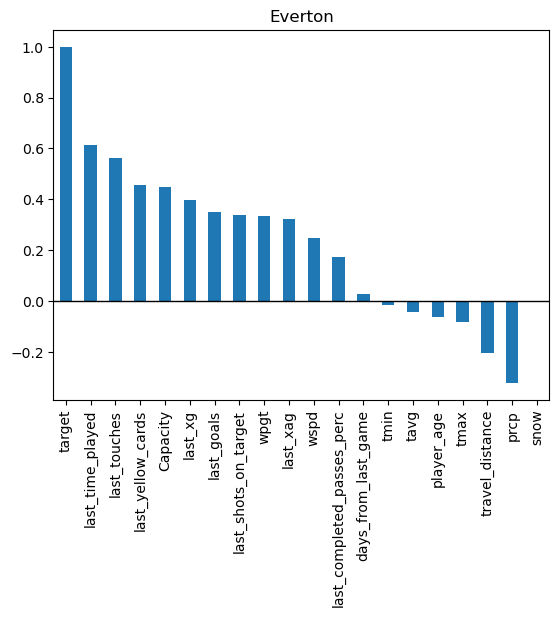

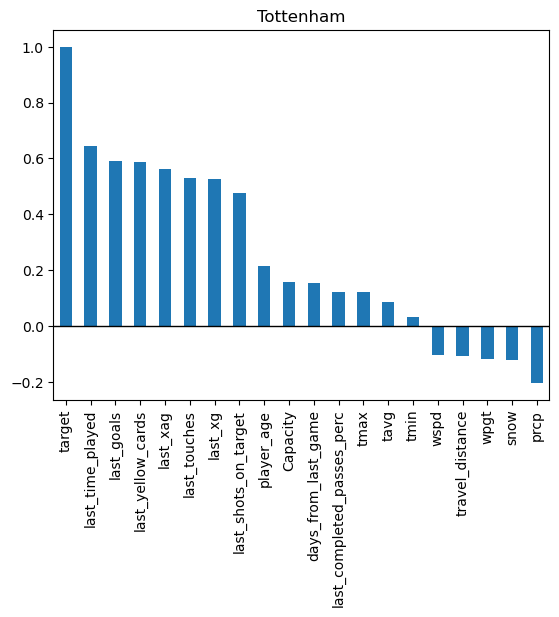

In [31]:
for time in dataset_features_time.keys():
    dataset_abuble = pd.DataFrame.from_dict(dataset_features_time[time], orient='index')
    correlacao = dataset_abuble.corrwith(dataset_abuble['target']).sort_values(ascending=False)

    correlacao.plot(kind='bar')
    plt.title(time)
    plt.axhline(y=0, linewidth=1, color='black')
    plt.show()
    #correlacao

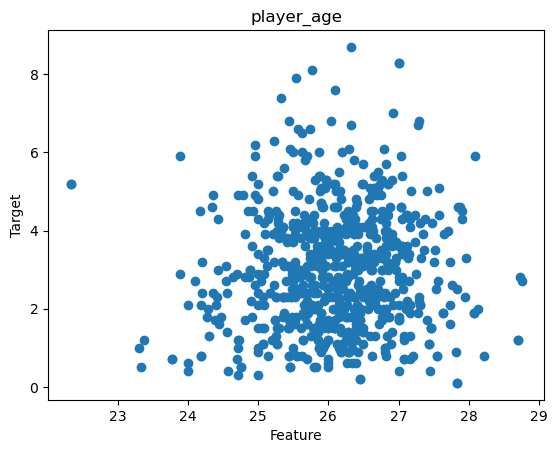

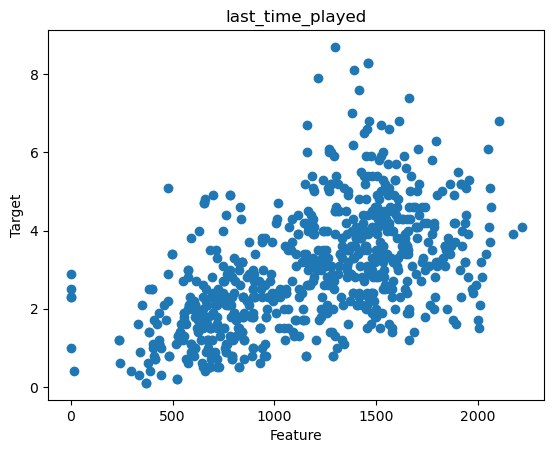

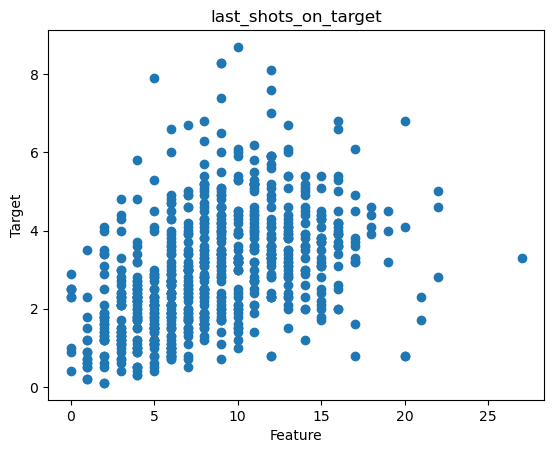

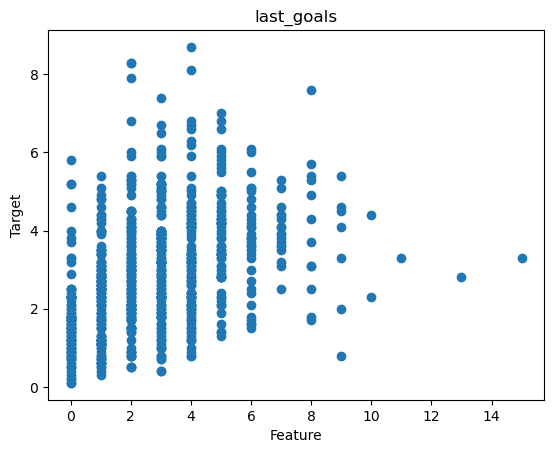

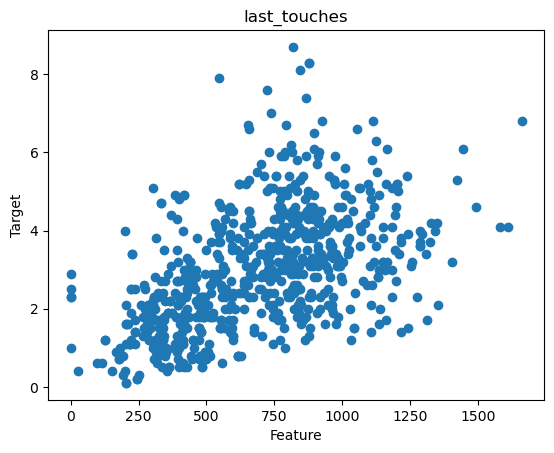

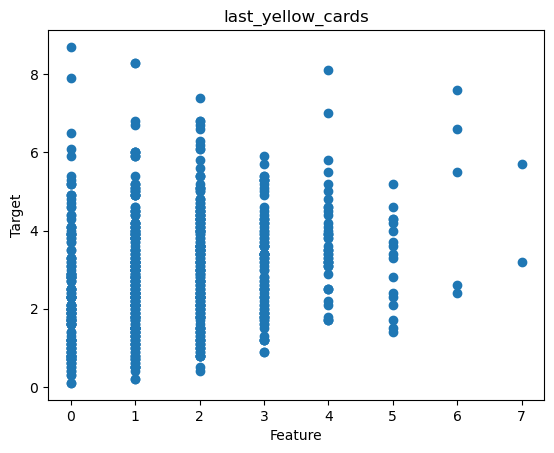

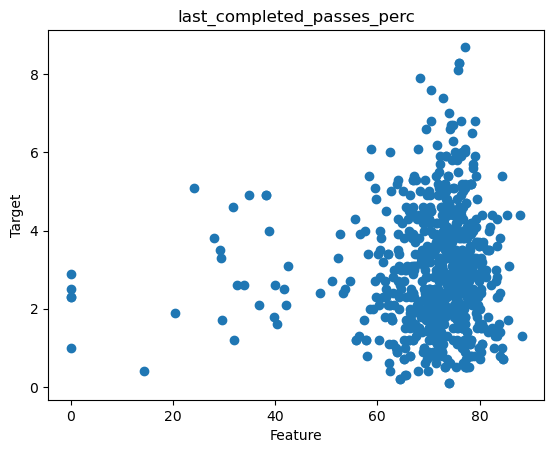

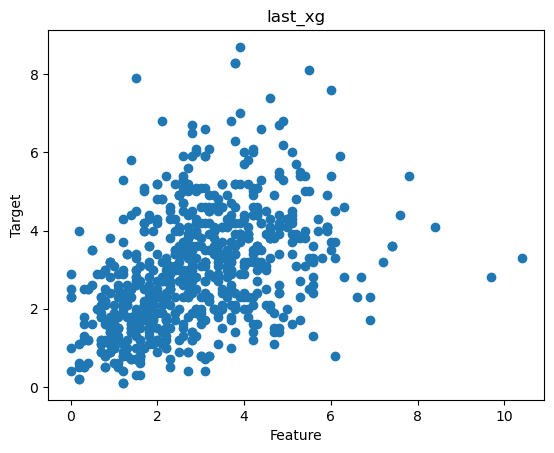

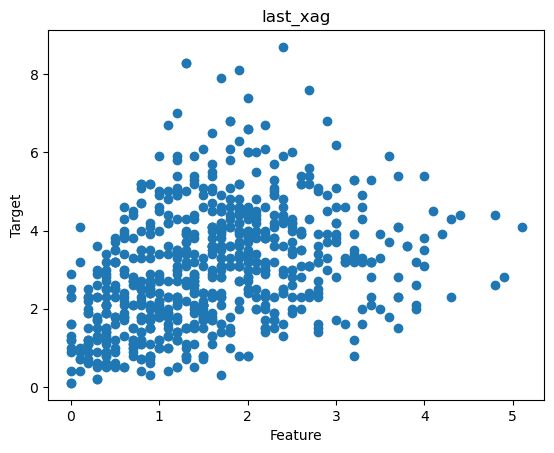

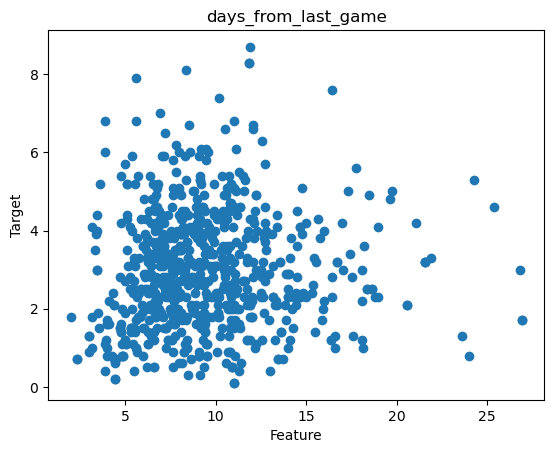

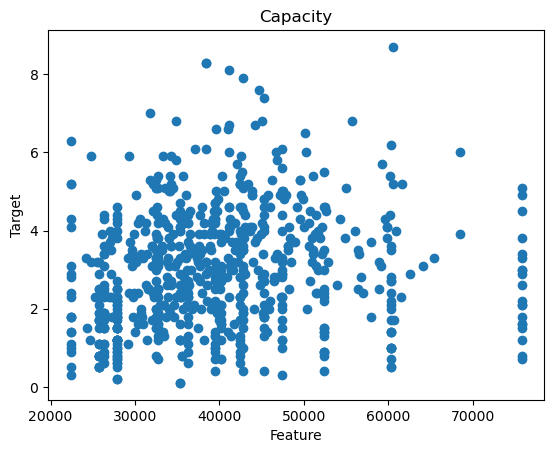

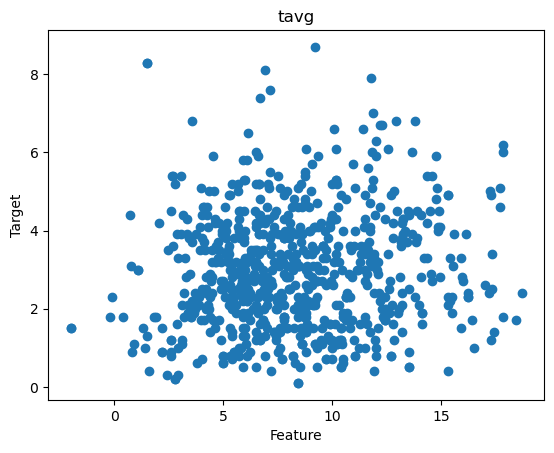

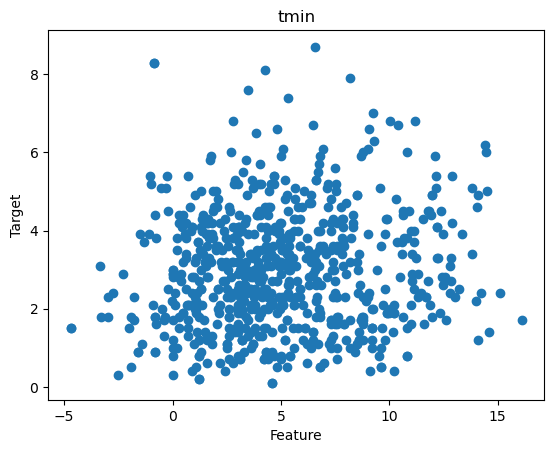

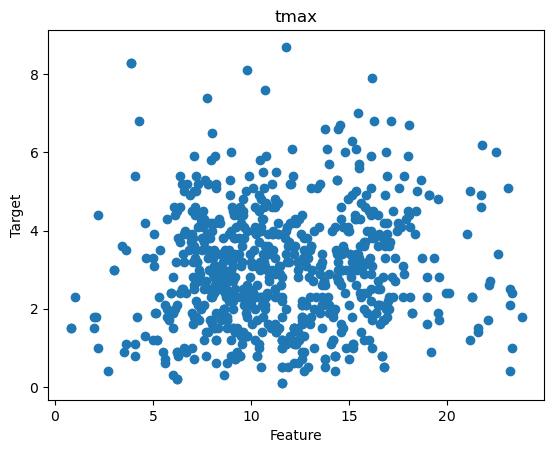

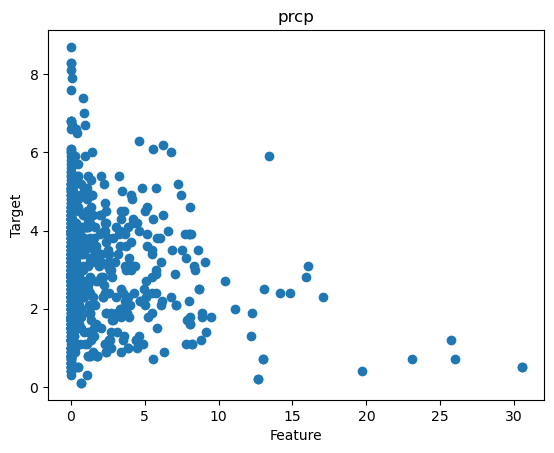

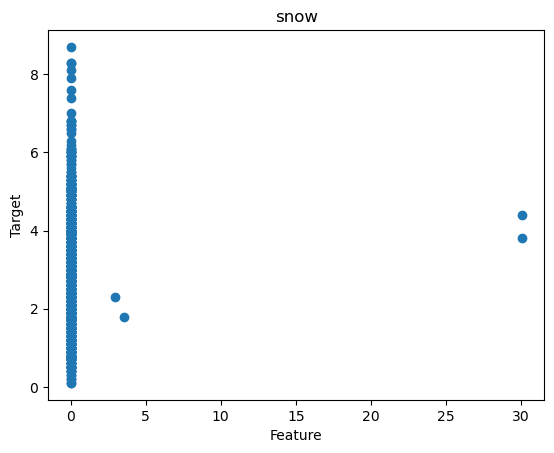

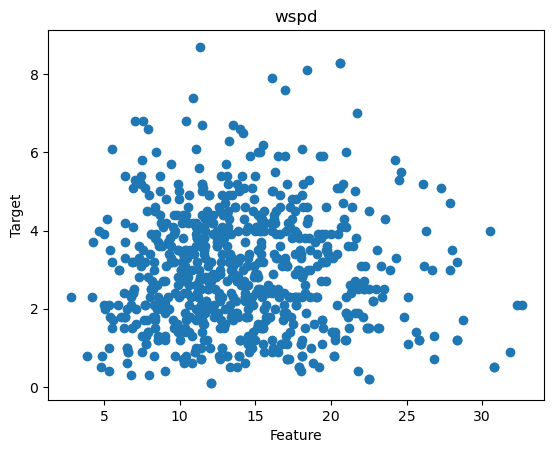

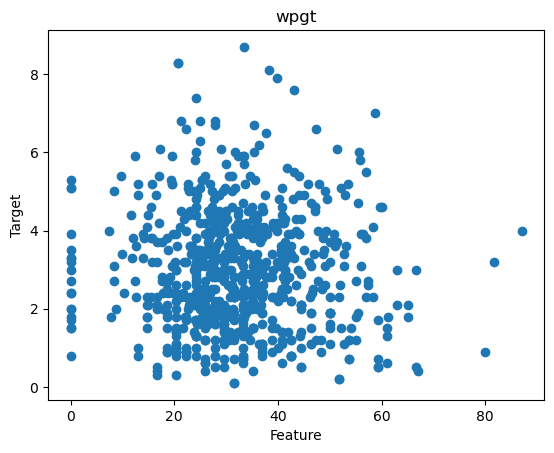

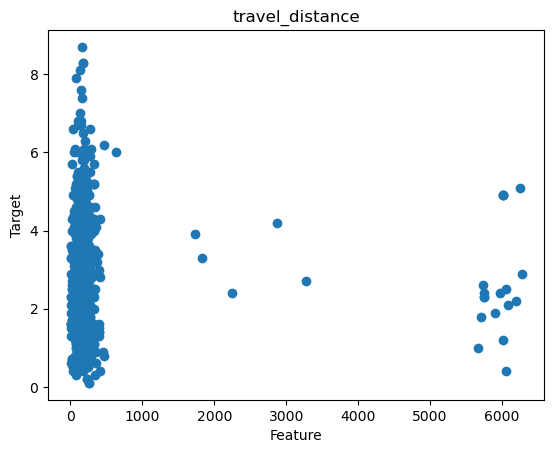

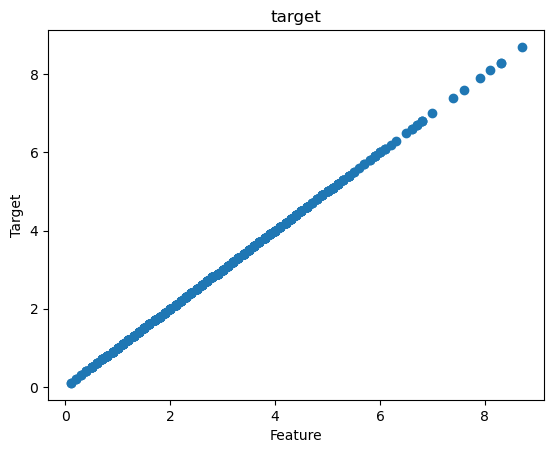

In [20]:
features = list(dataset_features_time['Arsenal'][1].keys())
for feature in features:
    pontos_x = list()
    pontos_y = list()
    for time in dataset_features_time.keys():
        for semana in dataset_features_time[time]:
            pontos_x.append(dataset_features_time[time][semana][feature])
            pontos_y.append(dataset_features_time[time][semana]['target'])
    plt.title(feature)
    plt.scatter(pontos_x,pontos_y)
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.show()

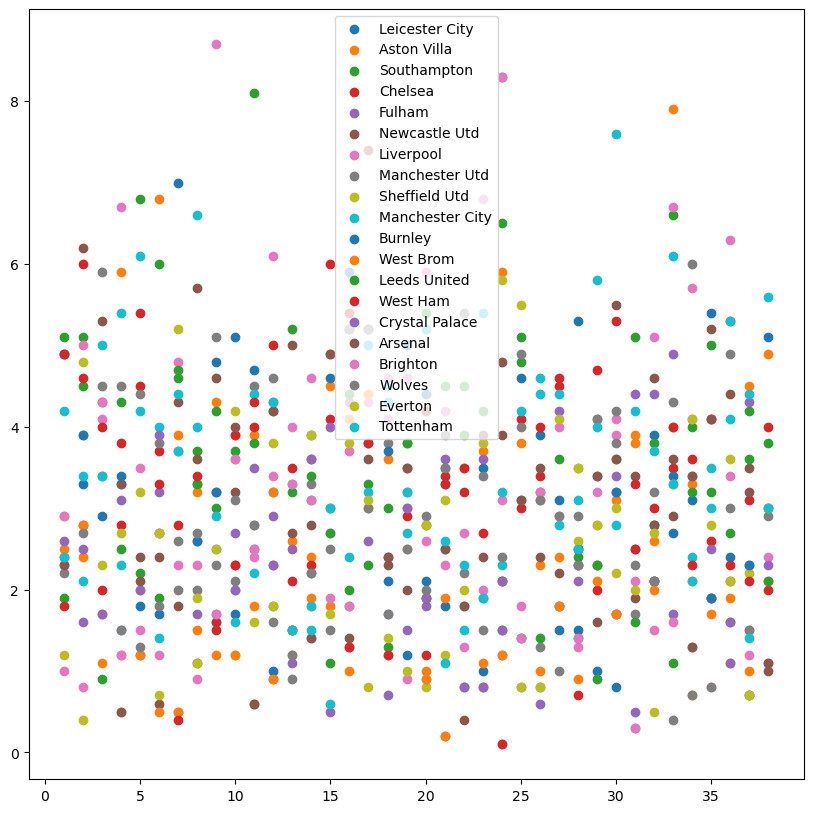

In [54]:
for time in dataset_features_time.keys():
    lista_target = []
    lista_semana = []
    for semana in dataset_features_time[time]:
        lista_target.append(dataset_features_time[time][semana]['target'])
        lista_semana.append(semana)
    plt.scatter(lista_semana, lista_target, label=time)
plt.rcParams["figure.figsize"] = (10,3)
plt.legend(loc='best')
plt.show()

### xT dataset

In [79]:
dataset_features_time = agrupar_features_por_time(dataset_xt)

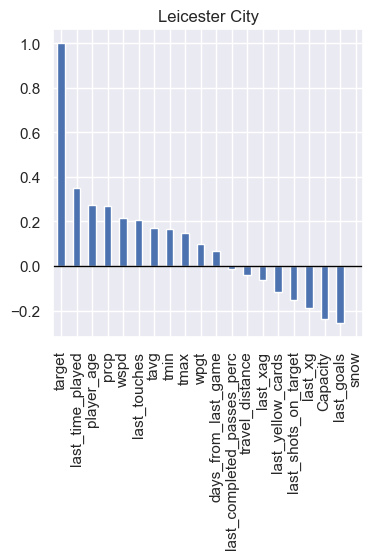

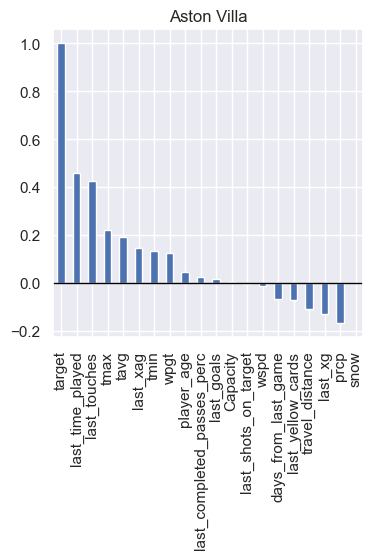

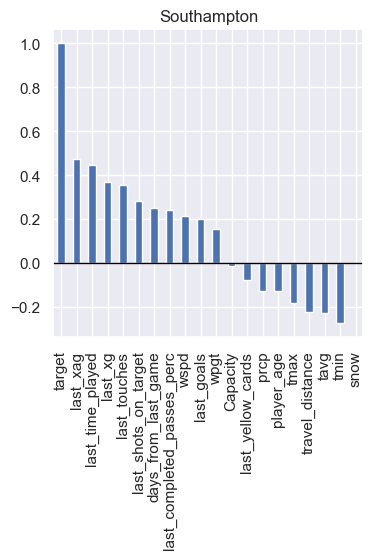

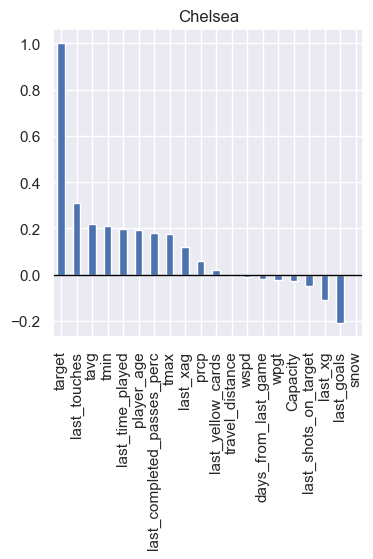

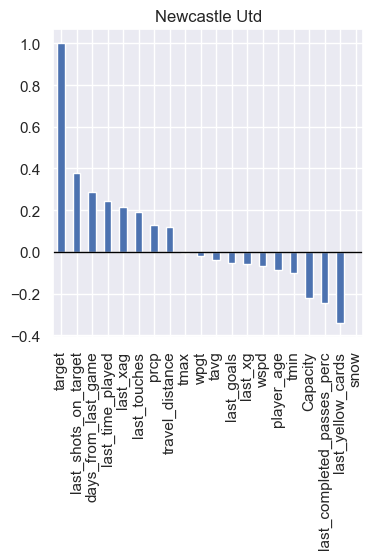

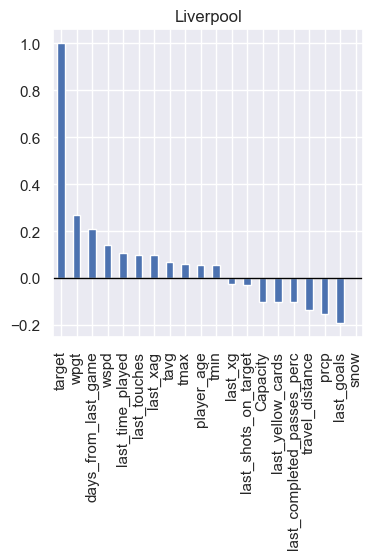

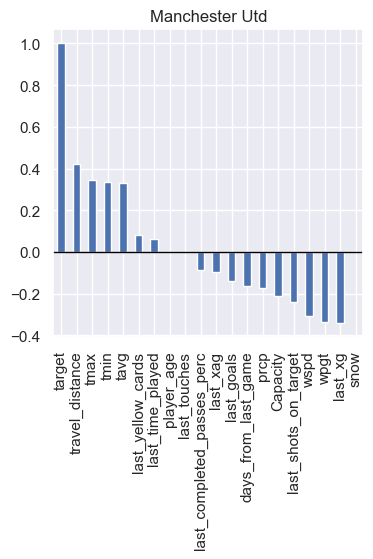

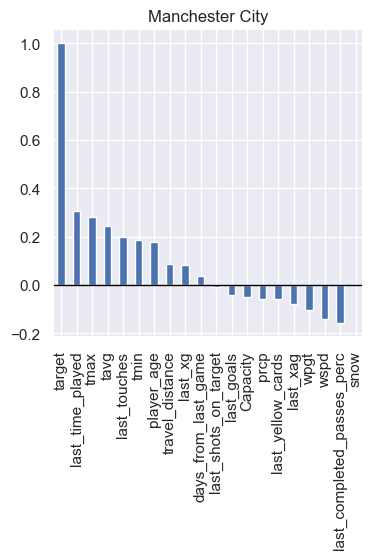

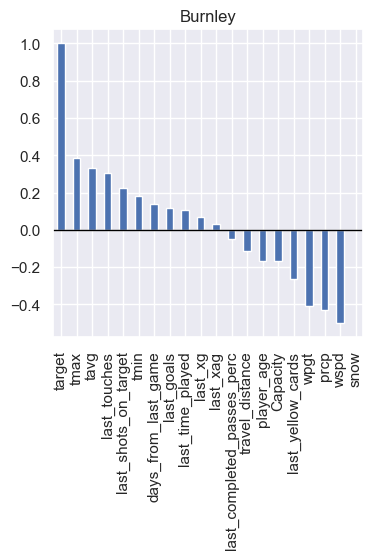

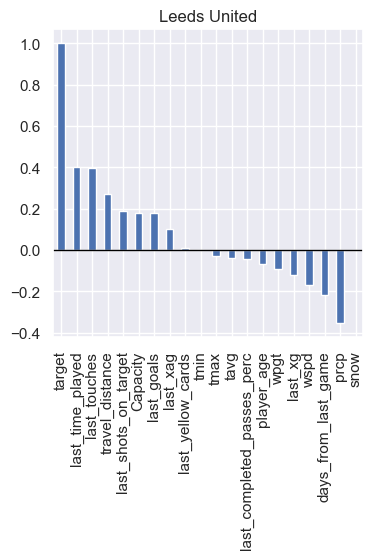

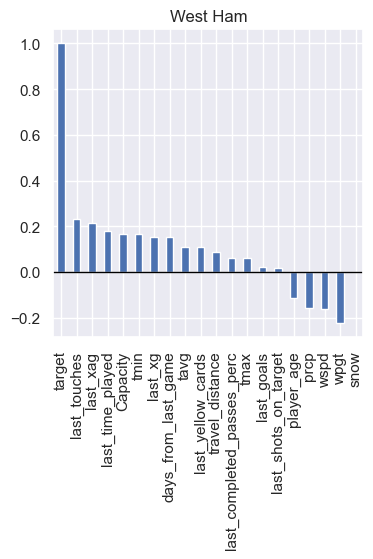

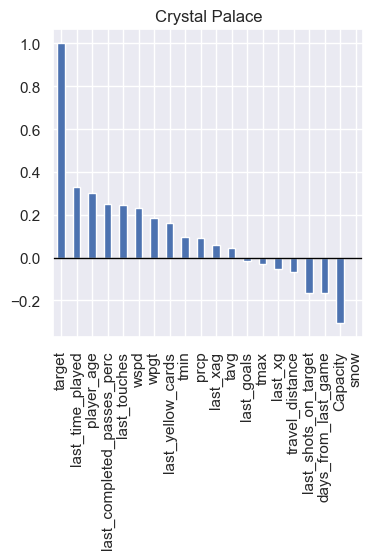

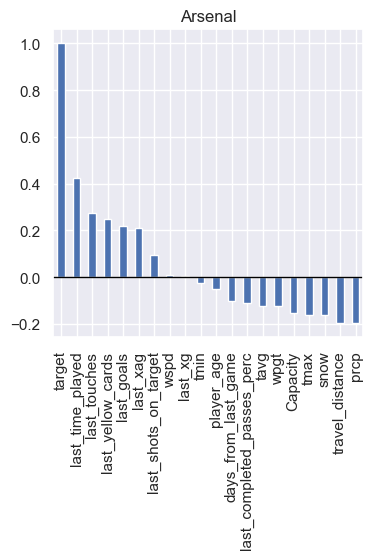

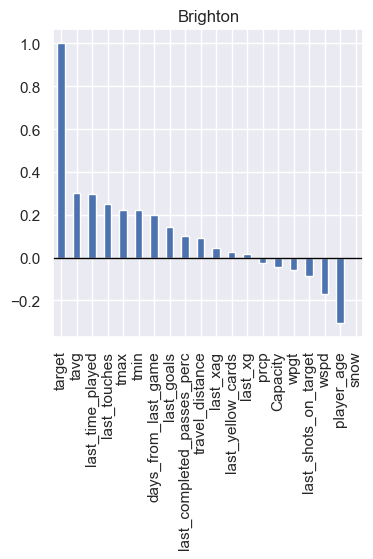

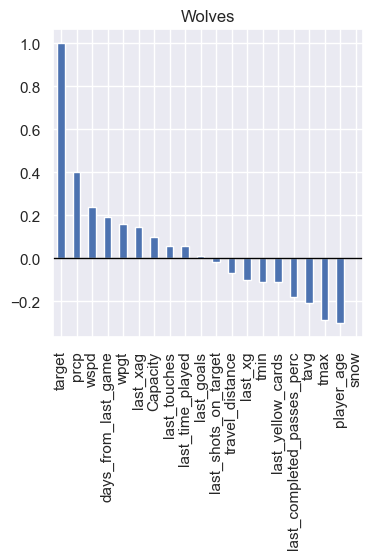

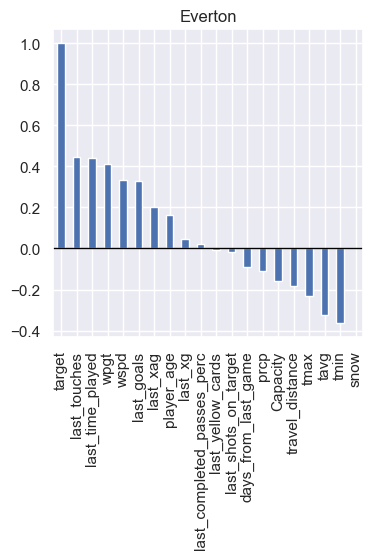

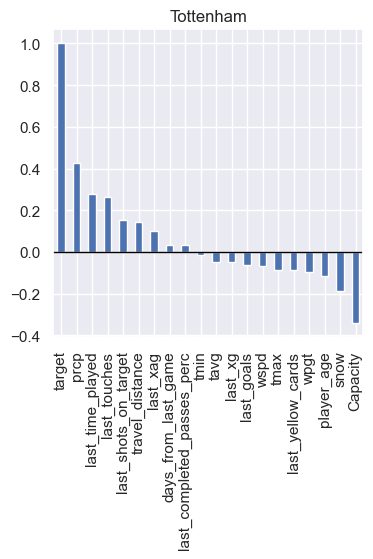

In [80]:
for time in dataset_features_time.keys():
    if len(dataset_features_time[time].keys()) == 0:
        continue
    dataset_abuble = pd.DataFrame.from_dict(dataset_features_time[time], orient='index')
    correlacao = dataset_abuble.corrwith(dataset_abuble['target']).sort_values(ascending=False)

    correlacao.plot(kind='bar')
    plt.title(time)
    plt.axhline(y=0, linewidth=1, color='black')
    plt.show()
    #correlacao

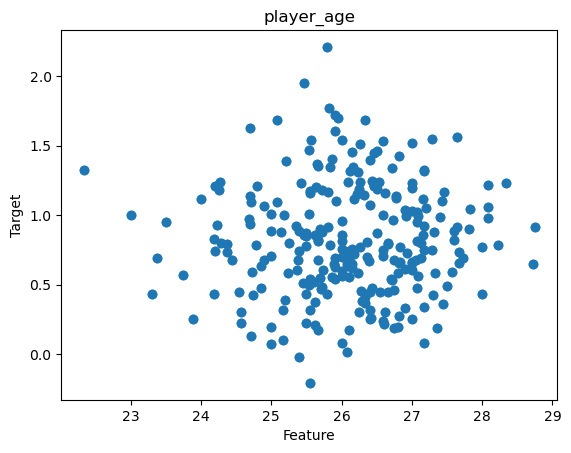

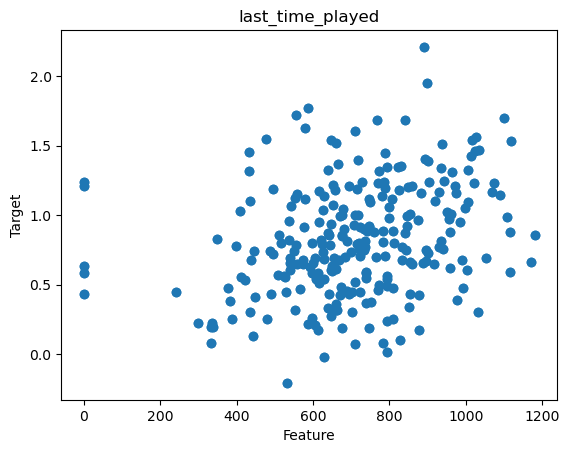

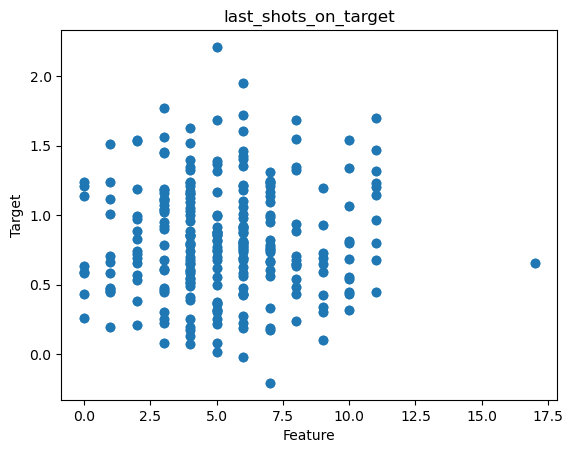

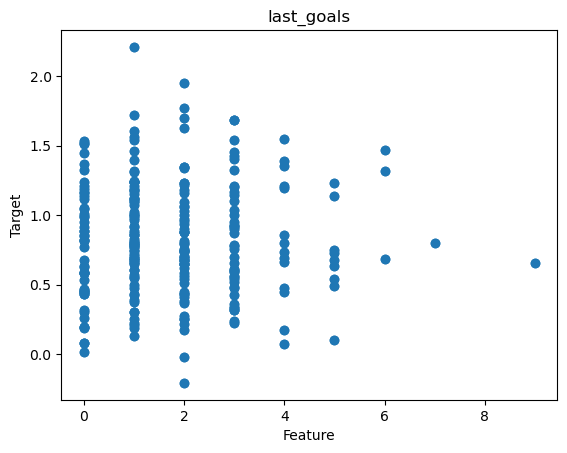

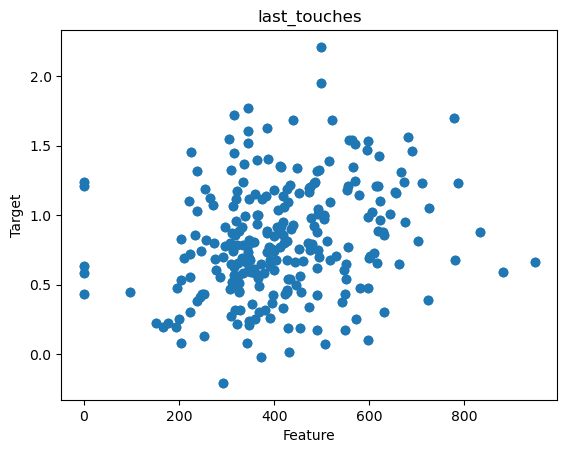

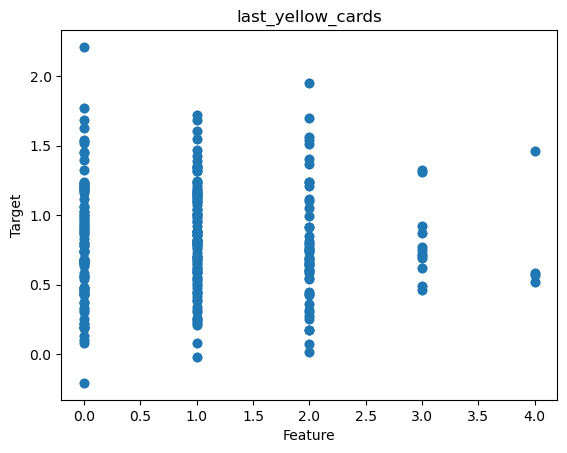

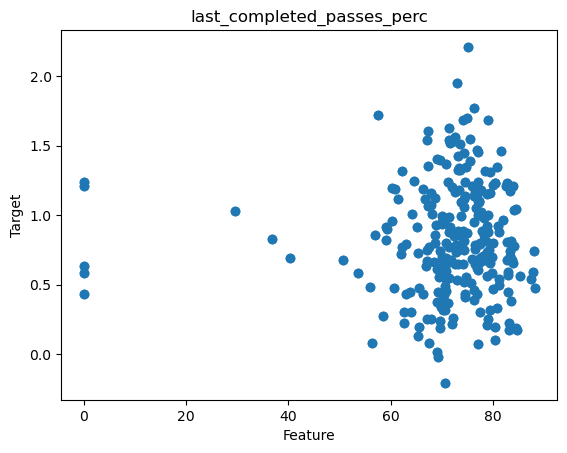

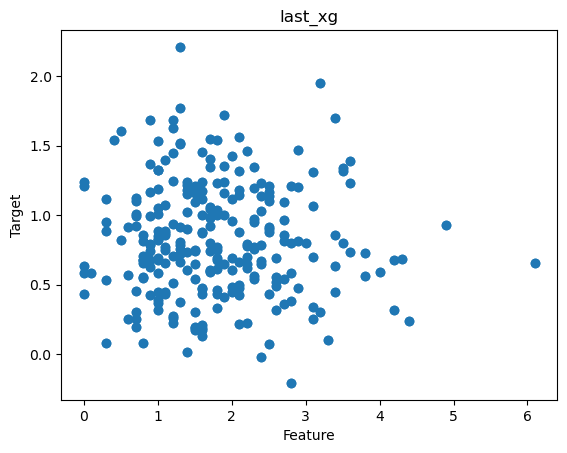

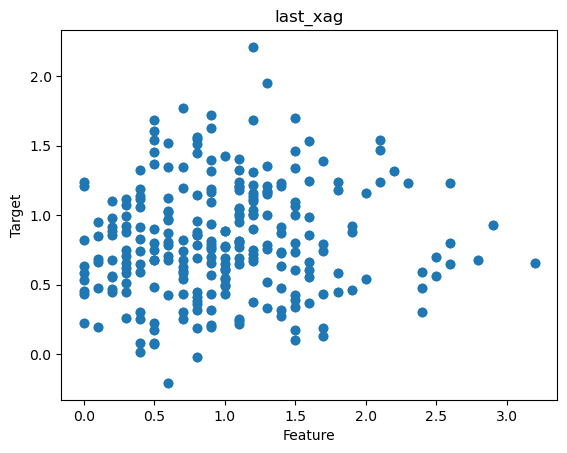

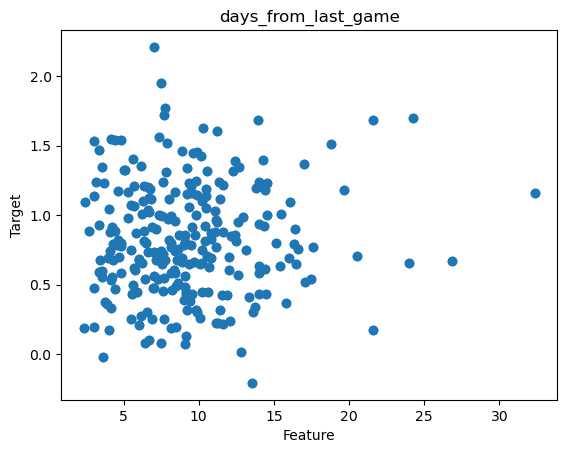

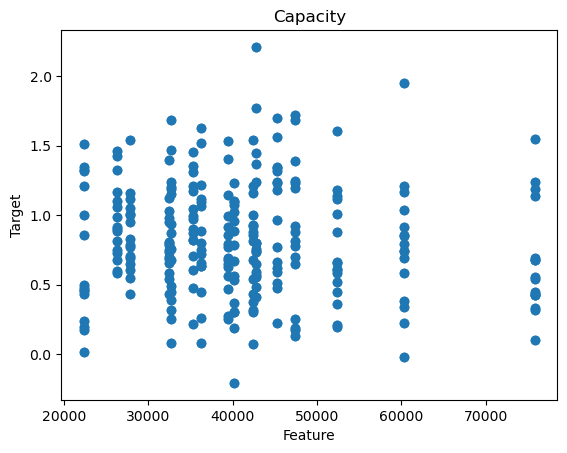

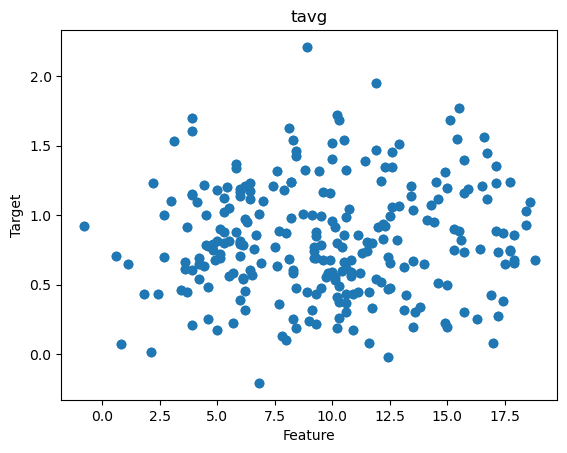

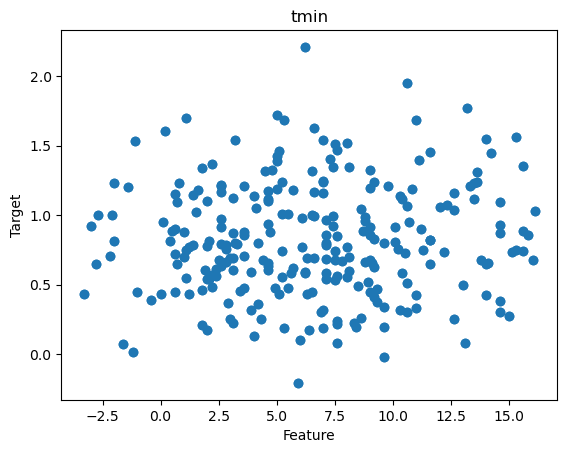

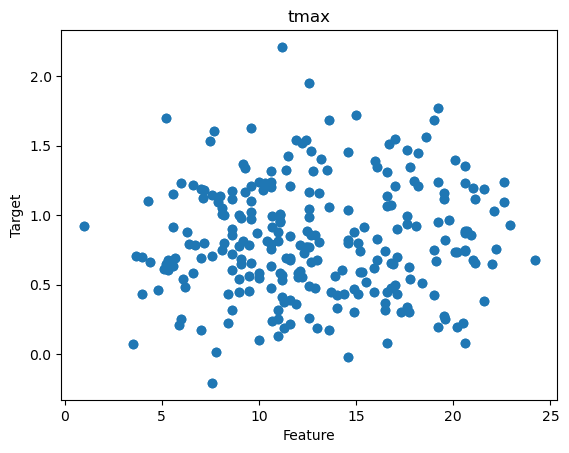

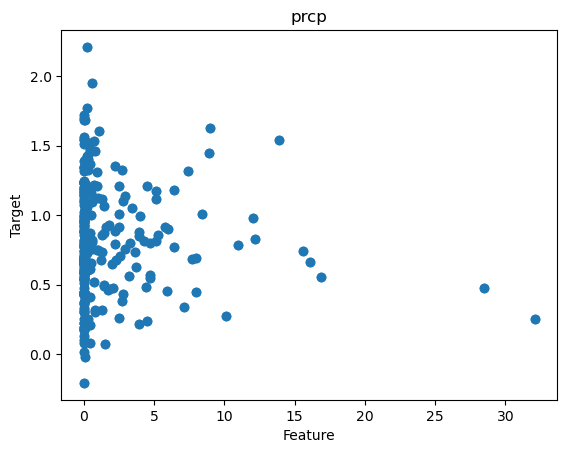

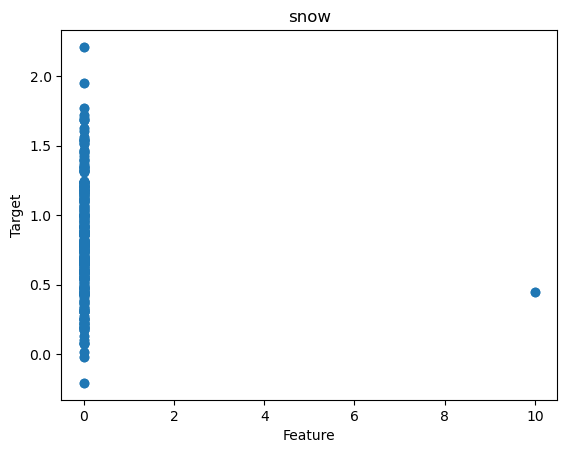

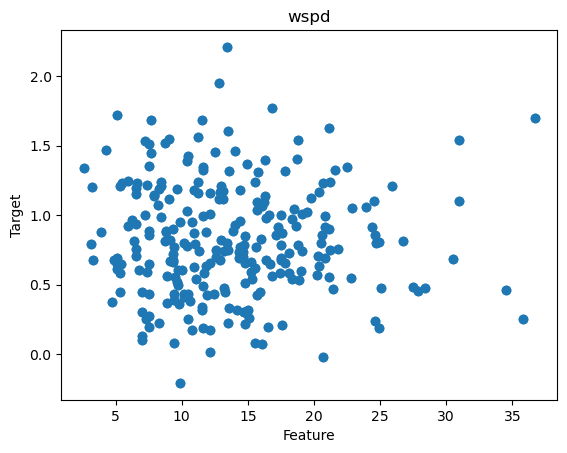

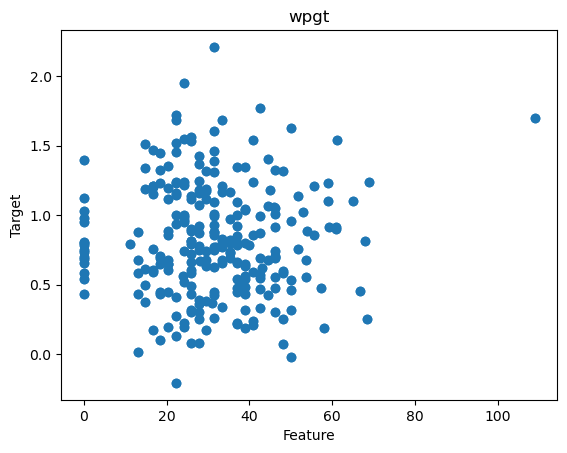

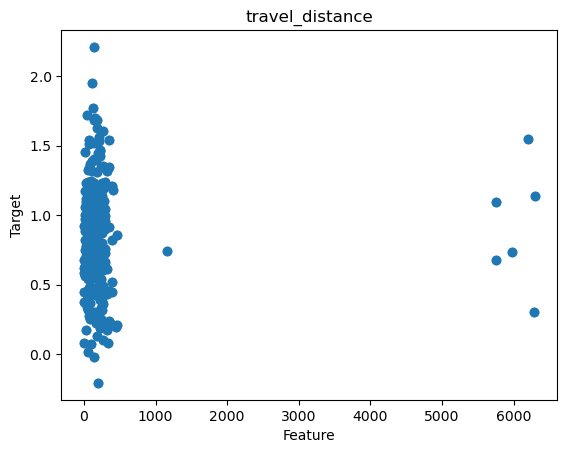

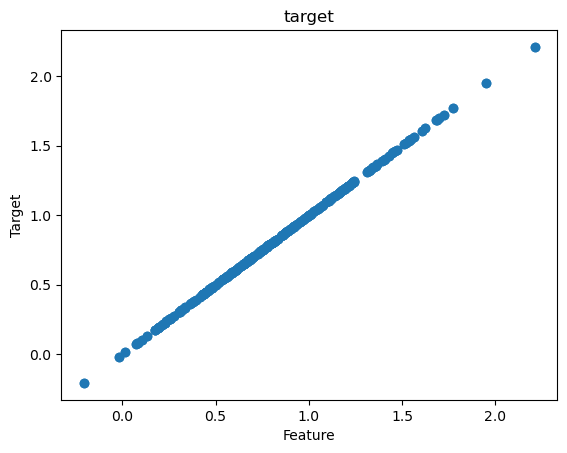

In [35]:
features = list(dataset_features_time['Arsenal'][2].keys())
for feature in features:
    pontos_x = list()
    pontos_y = list()
    for time in dataset_features_time.keys():
        for semana in dataset_features_time[time]:
            pontos_x.append(dataset_features_time[time][semana][feature])
            pontos_y.append(dataset_features_time[time][semana]['target'])
    plt.title(feature)
    plt.scatter(pontos_x,pontos_y)
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.show()

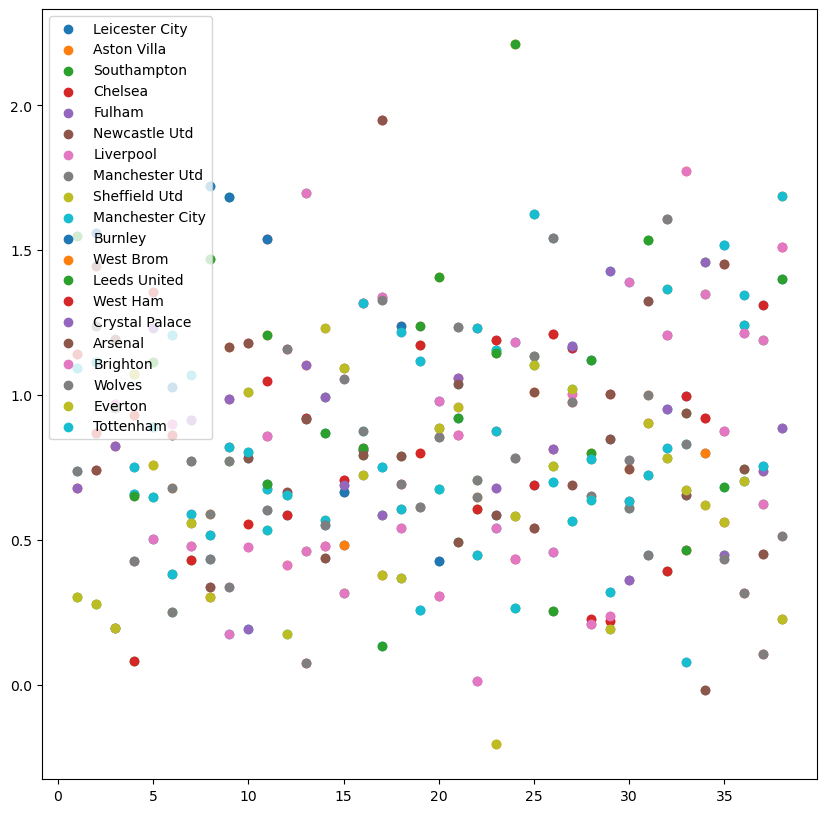

In [58]:
for time in dataset_features_time.keys():
    lista_target = []
    lista_semana = []
    for semana in dataset_features_time[time]:
        lista_target.append(dataset_features_time[time][semana]['target'])
        lista_semana.append(semana)
    plt.scatter(lista_semana, lista_target, label=time)
plt.rcParams["figure.figsize"] = (10,20)
plt.legend(loc='best')
plt.show()

### VAEP dataset

In [37]:
dataset_features_time = agrupar_features_por_time(dataset_vaep)

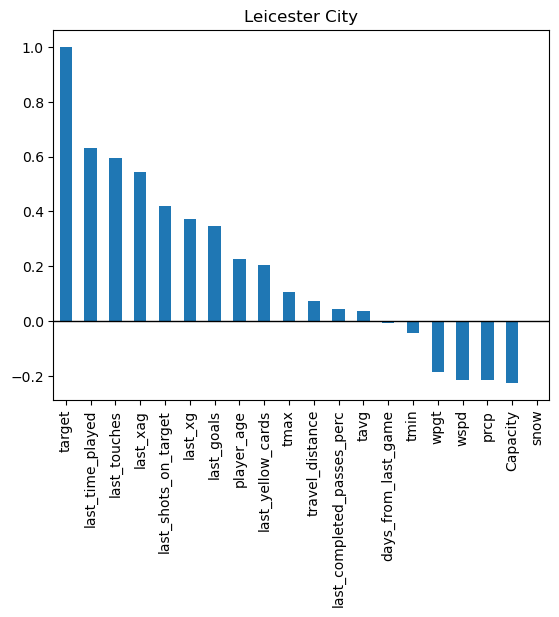

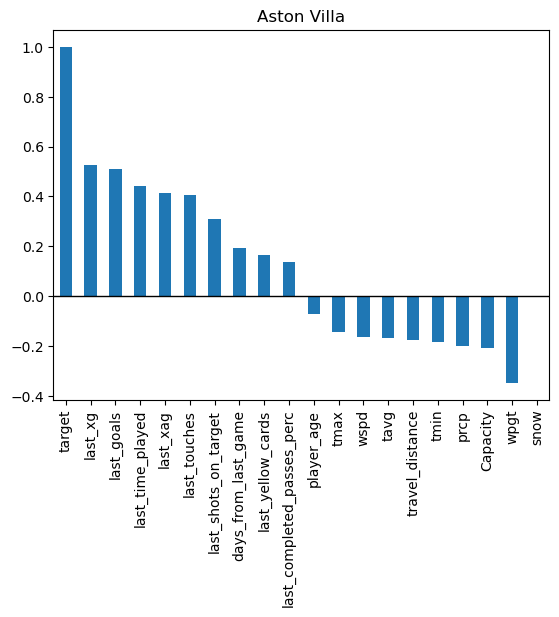

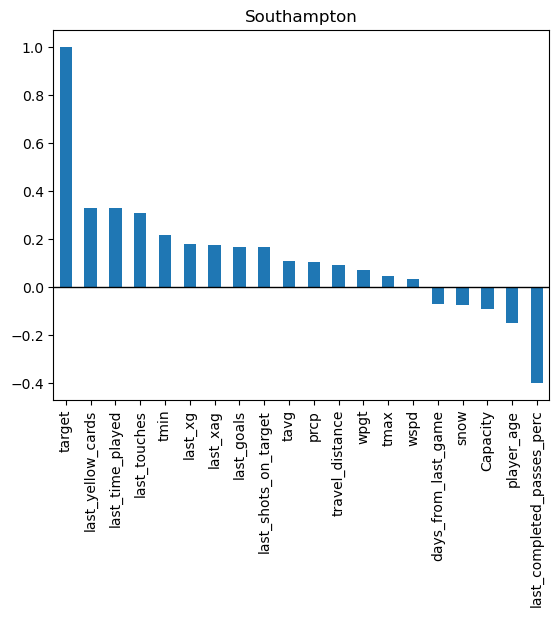

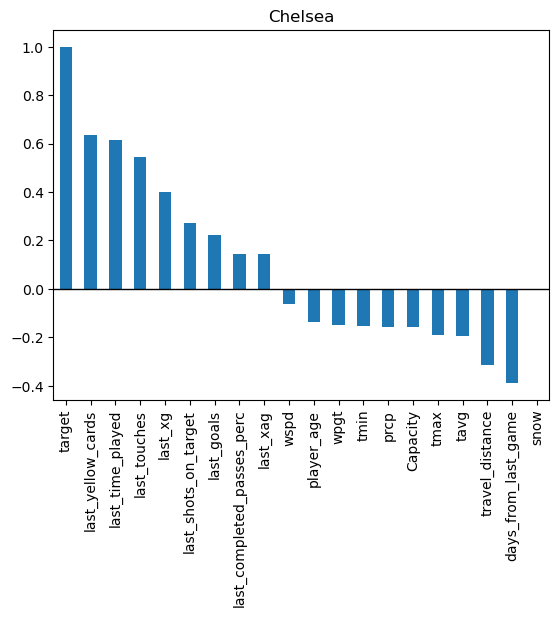

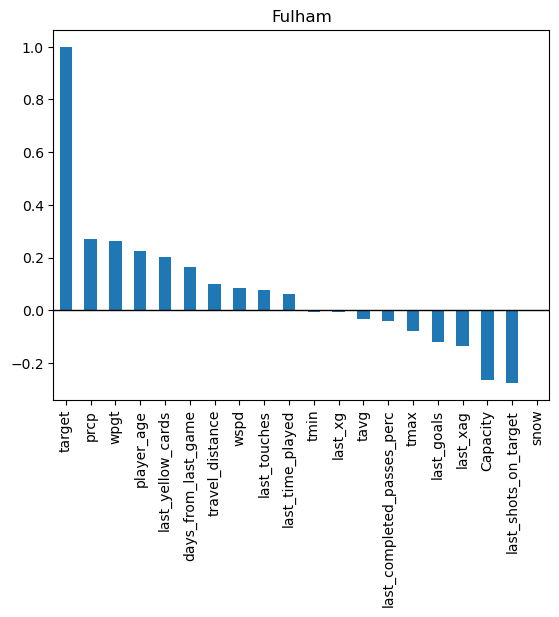

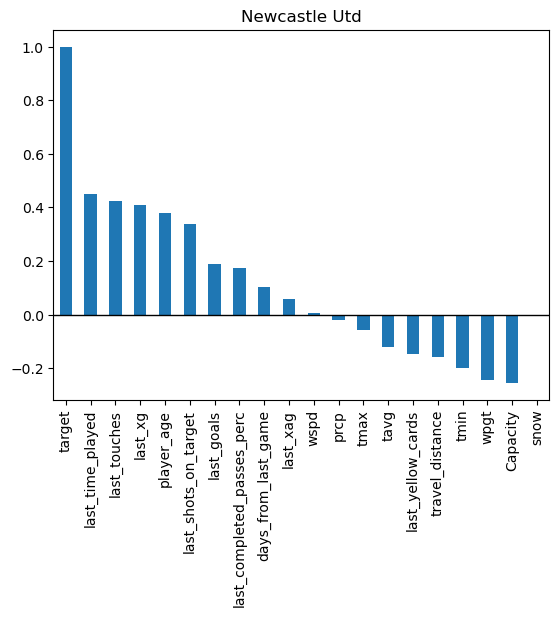

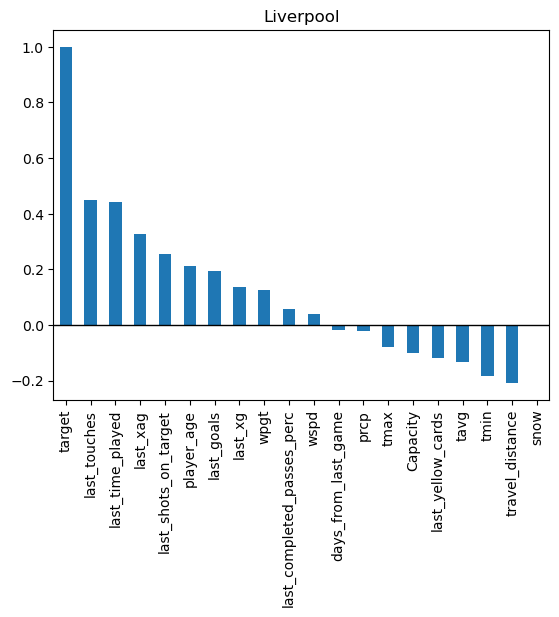

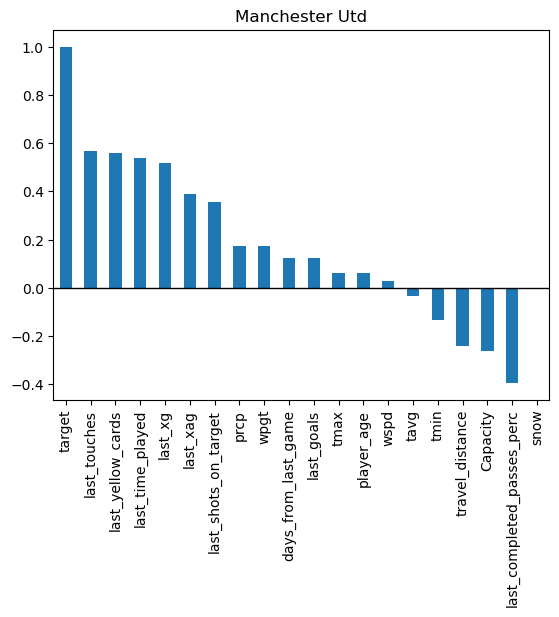

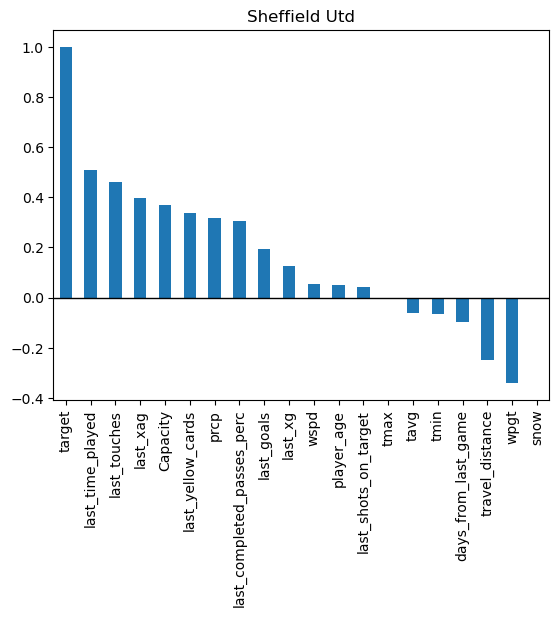

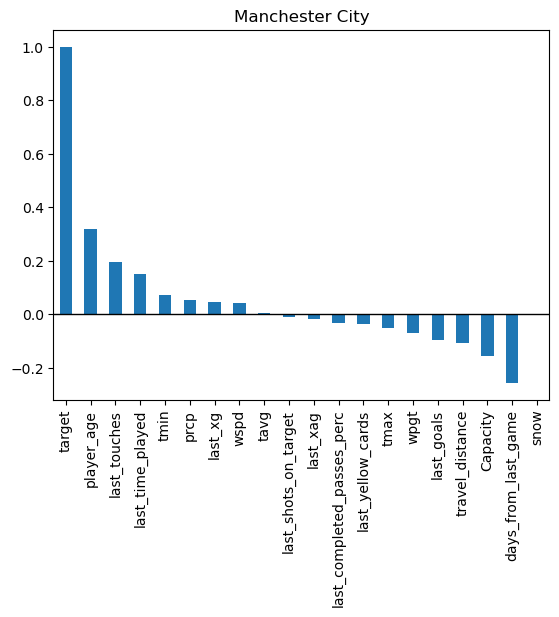

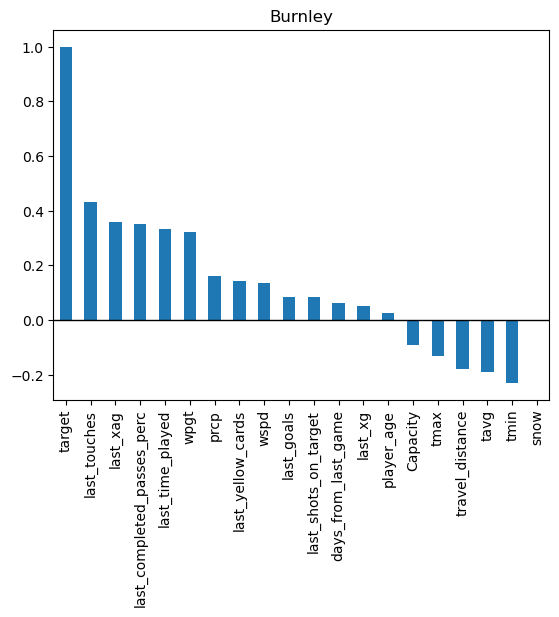

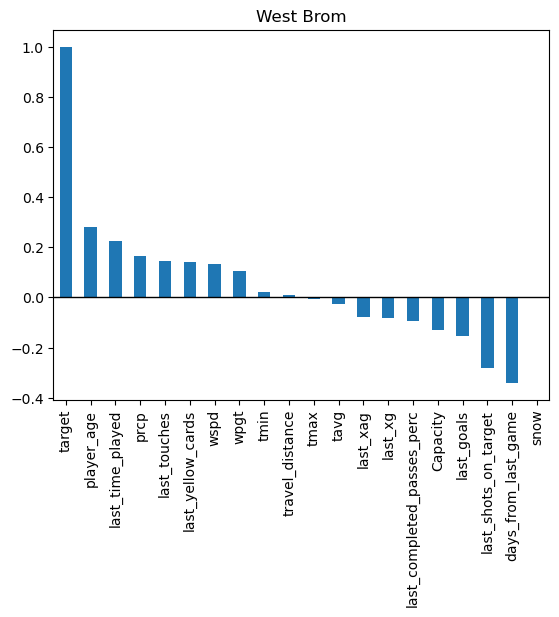

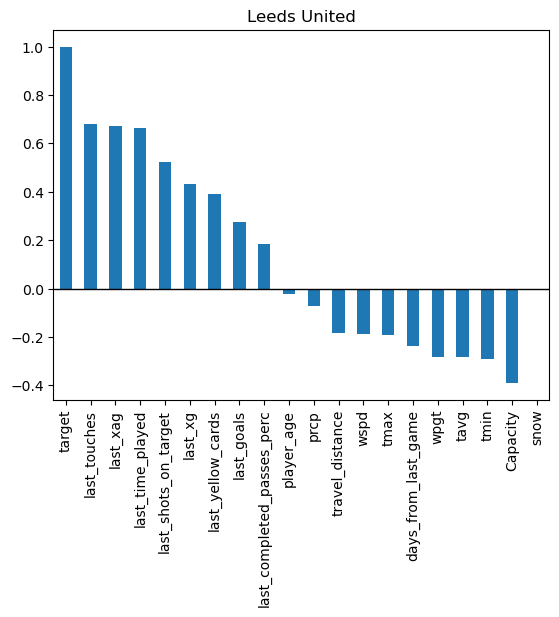

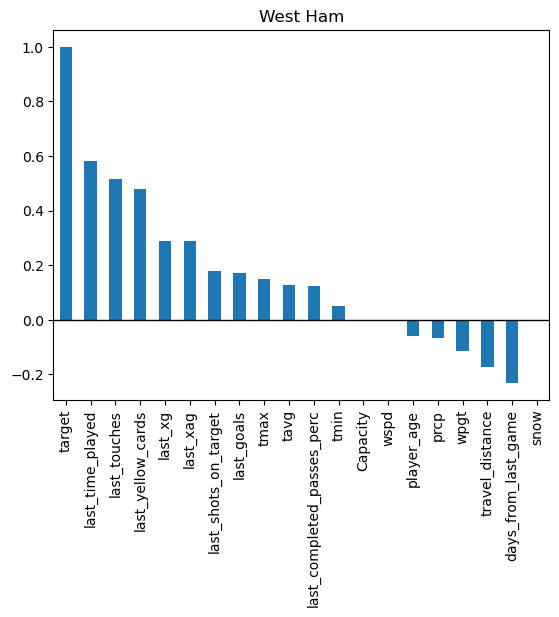

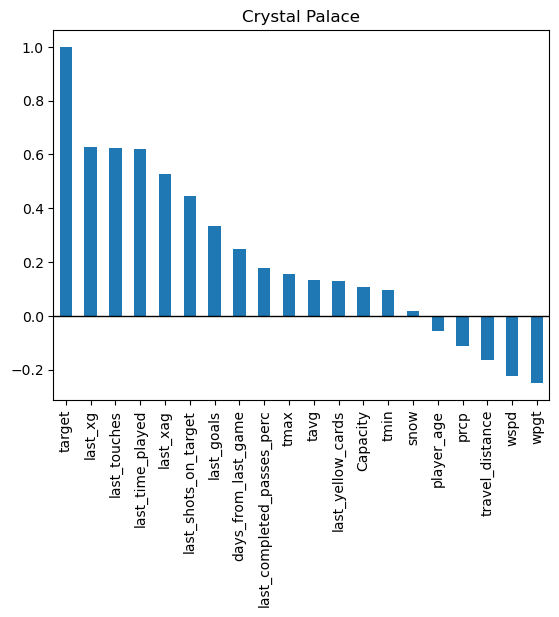

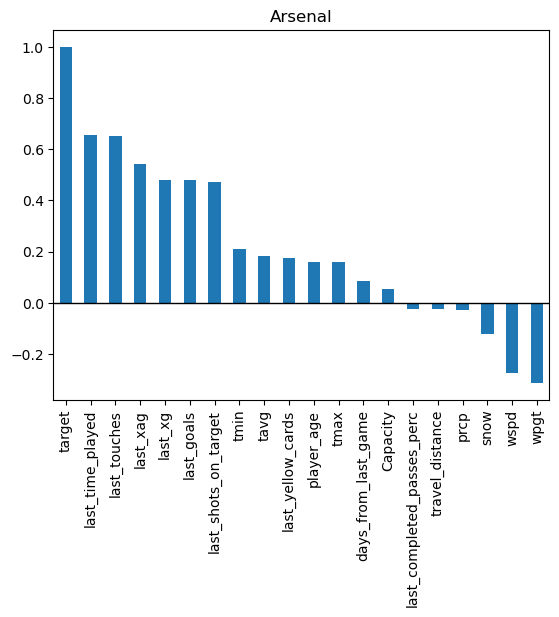

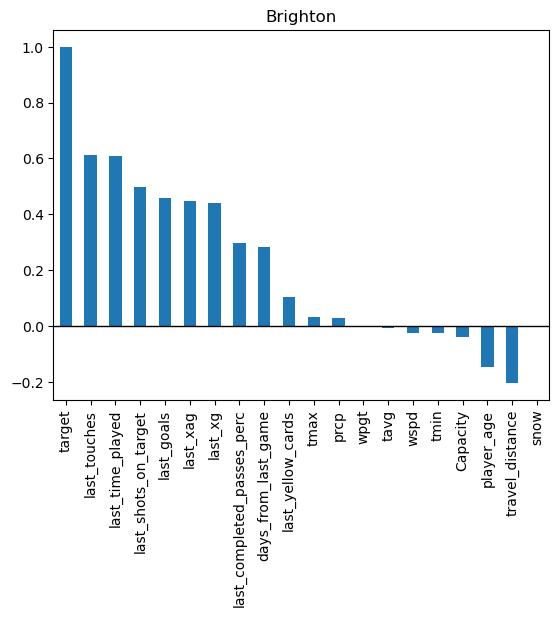

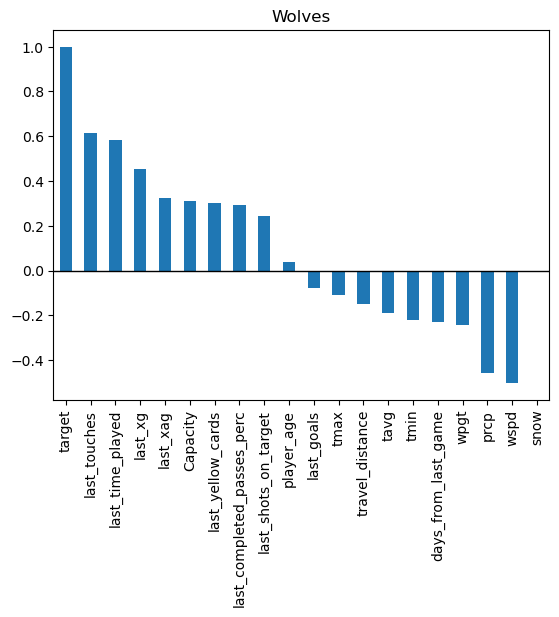

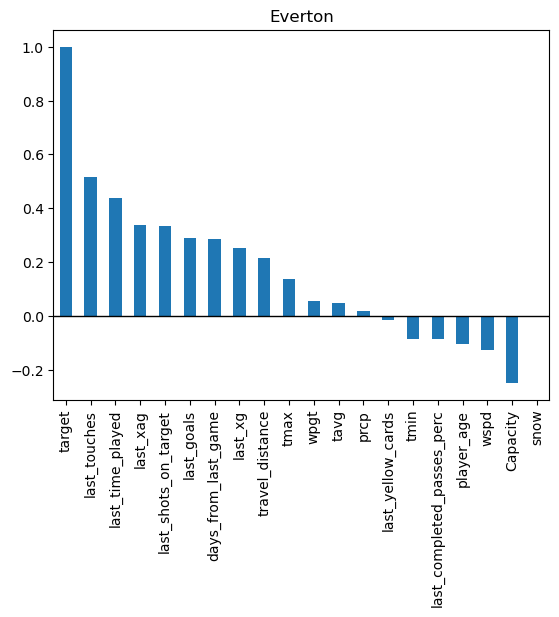

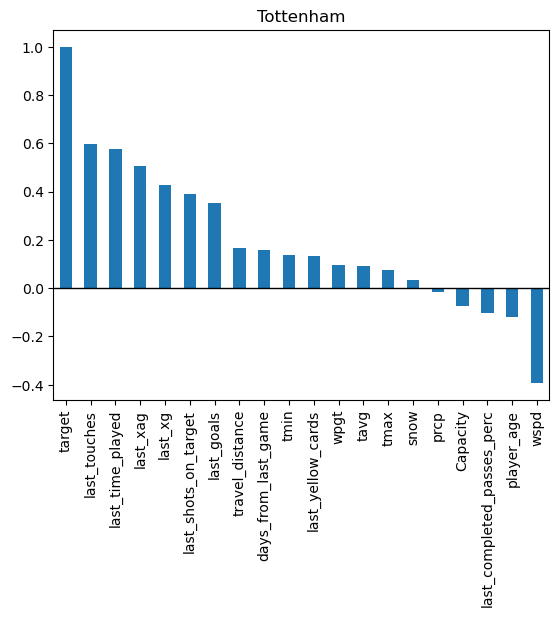

In [38]:
for time in dataset_features_time.keys():
    dataset_abuble = pd.DataFrame.from_dict(dataset_features_time[time], orient='index')
    correlacao = dataset_abuble.corrwith(dataset_abuble['target']).sort_values(ascending=False)

    correlacao.plot(kind='bar')
    plt.title(time)
    plt.axhline(y=0, linewidth=1, color='black')
    plt.show()
    #correlacao

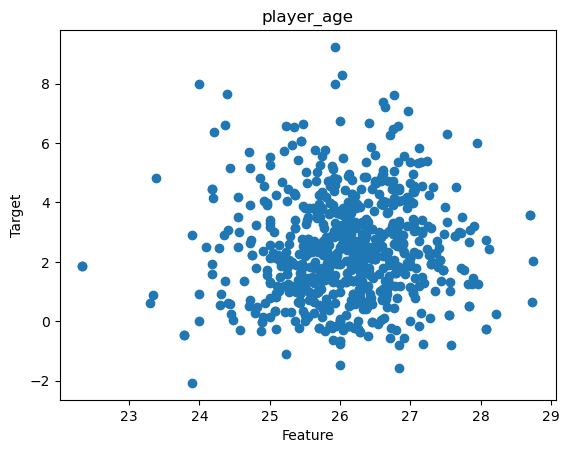

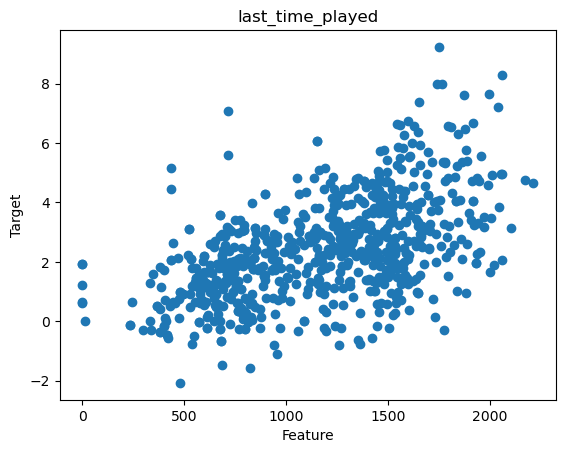

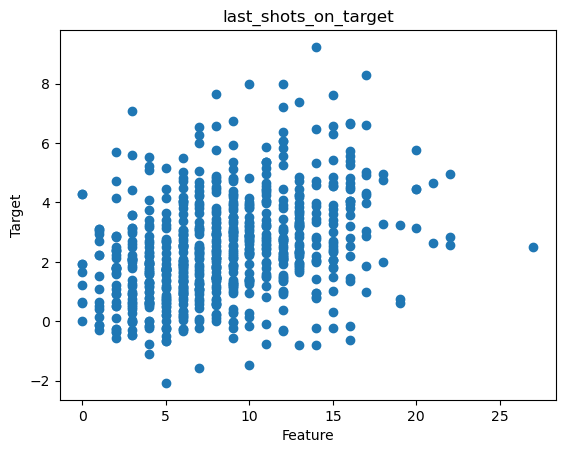

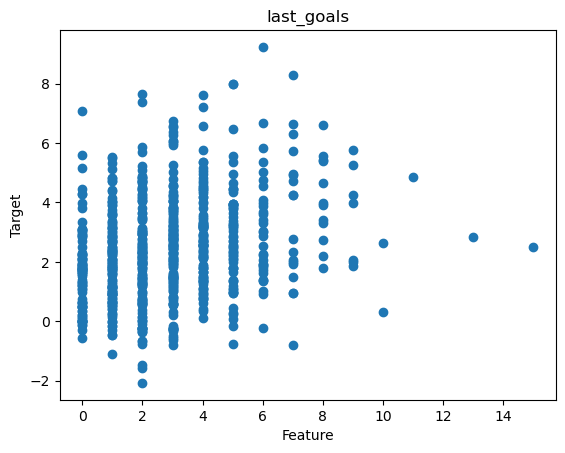

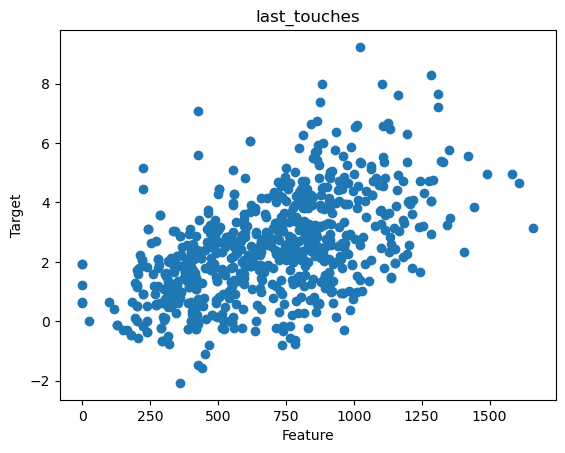

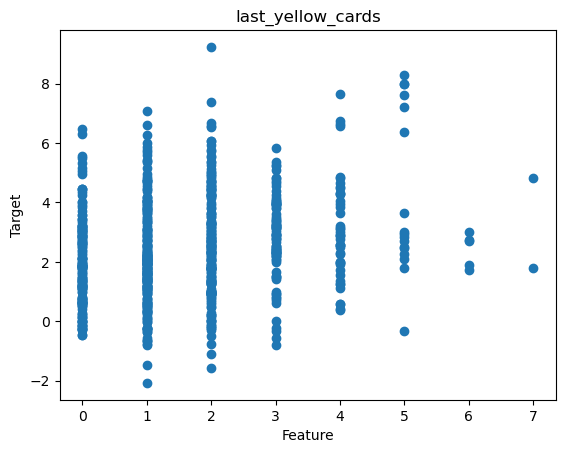

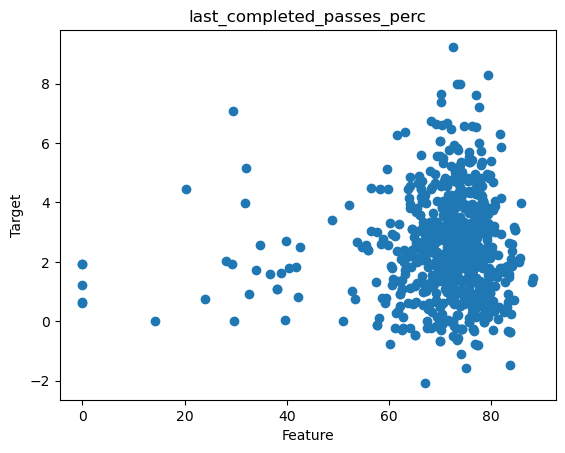

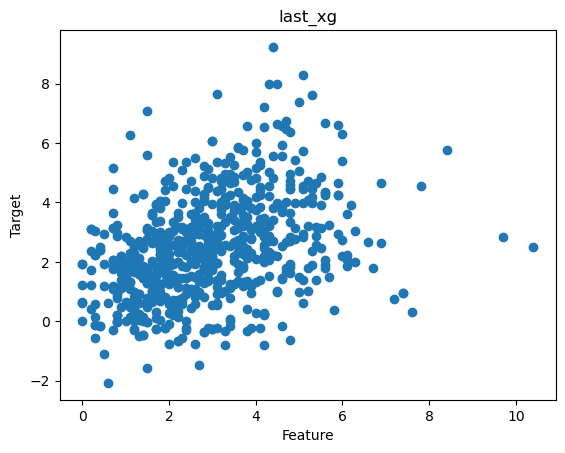

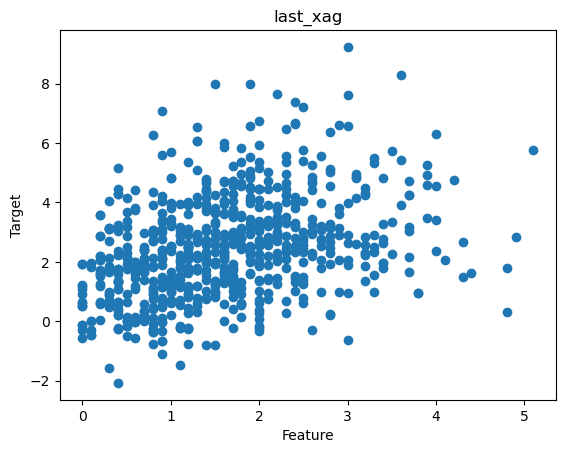

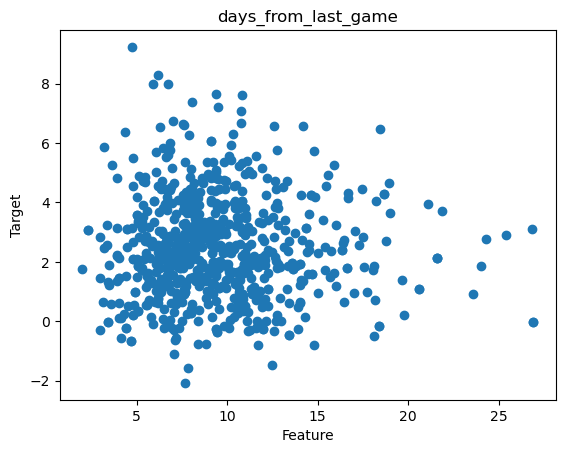

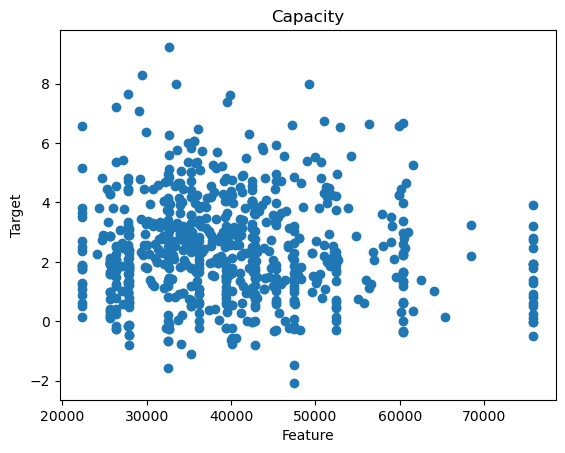

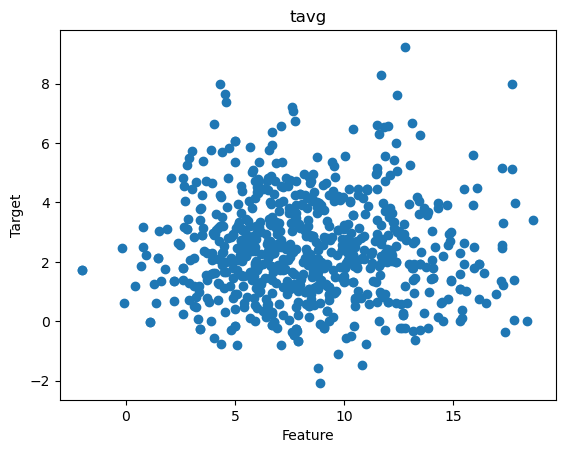

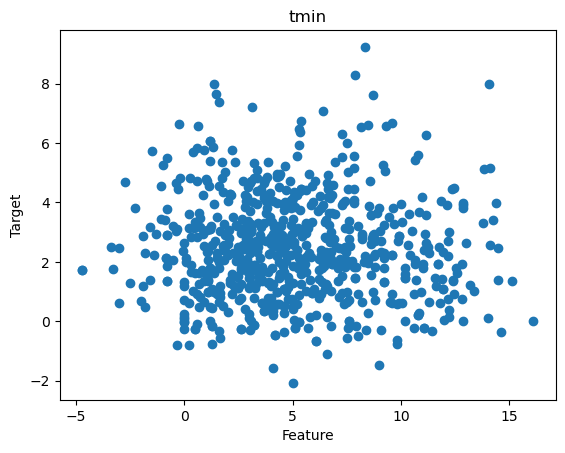

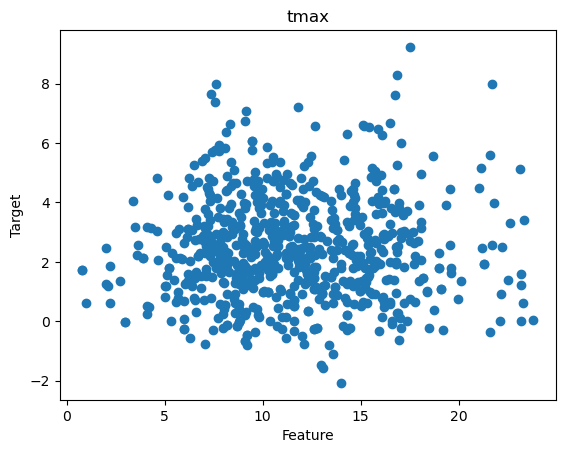

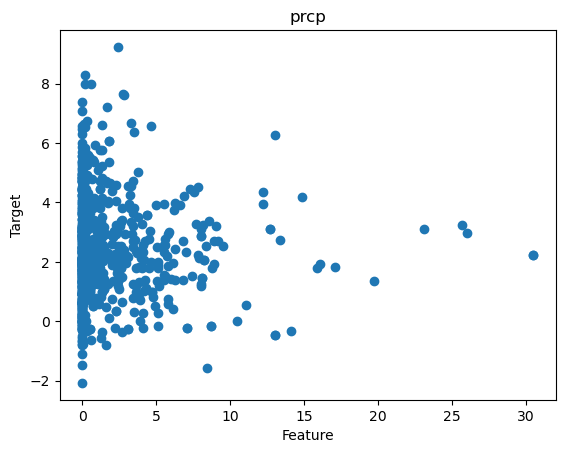

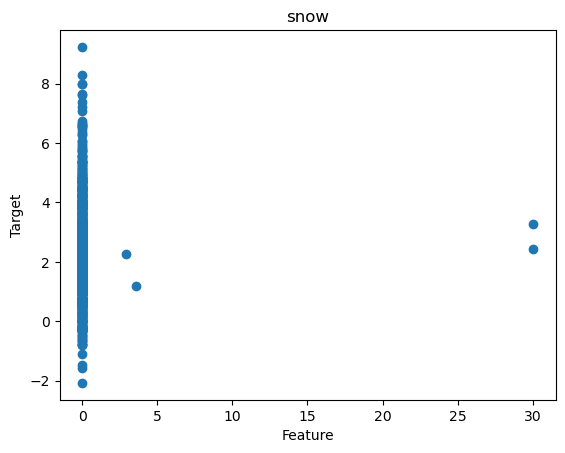

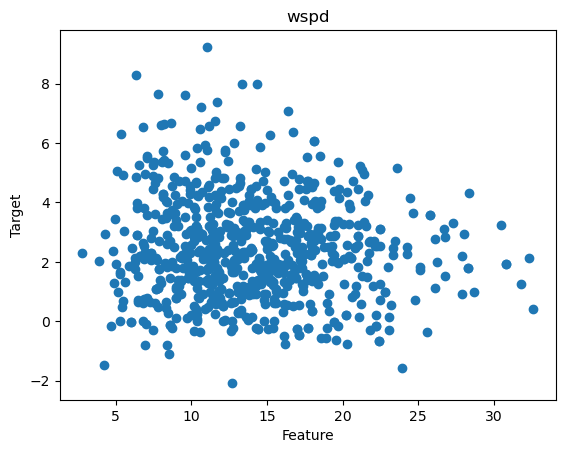

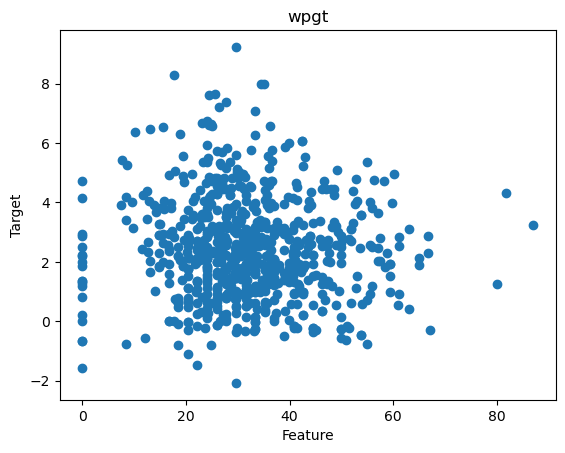

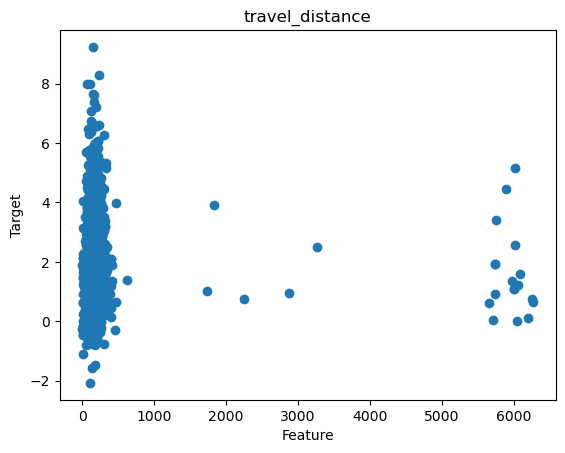

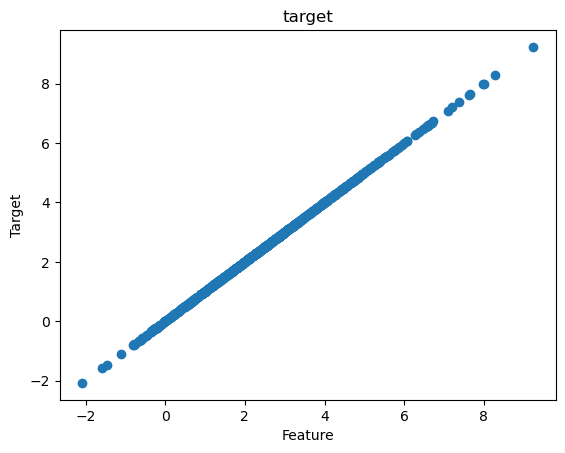

In [39]:
features = list(dataset_features_time['Arsenal'][2].keys())
for feature in features:
    pontos_x = list()
    pontos_y = list()
    for time in dataset_features_time.keys():
        for semana in dataset_features_time[time]:
            pontos_x.append(dataset_features_time[time][semana][feature])
            pontos_y.append(dataset_features_time[time][semana]['target'])
    plt.title(feature)
    plt.scatter(pontos_x,pontos_y)
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.show()

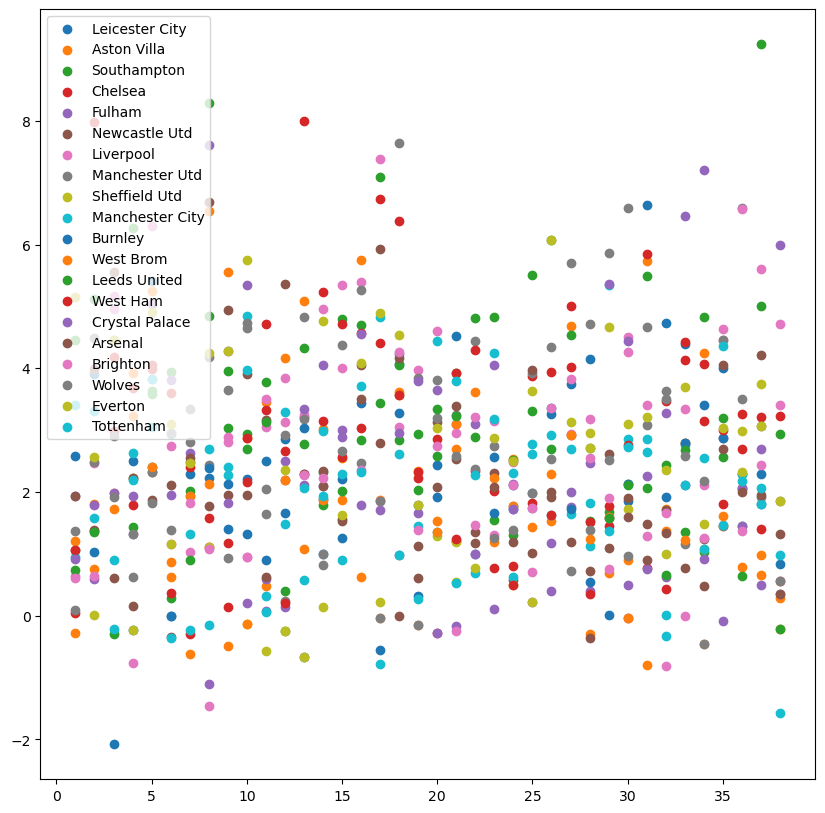

In [49]:
for time in dataset_features_time.keys():
    lista_target = []
    lista_semana = []
    for semana in dataset_features_time[time]:
        lista_target.append(dataset_features_time[time][semana]['target'])
        lista_semana.append(semana)
    plt.scatter(lista_semana, lista_target, label=time)
plt.rcParams["figure.figsize"] = (10,20)
plt.legend(loc='best')
plt.show()